# Data Analysis

For the analysis we will use libraries:
* _Pandas_ 
* _Numpy_  
* _Matplotlib_ 

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
%matplotlib inline

pd.set_option('notebook_repr_html', True)

## Loading 'final-player.txt' File and Cleaning the Data!

The Total Features Includes:

* _PlayerId_
* _Name_
* _Club_
* _Club Value_
* _Date of Birth_
* _Weight_
* _Height_
* _Country of Birth_
* _Role or Position_
* _Leading Foot_
* _Transfers (History of transfers)_
* _Injuries (History of injuries)_

In [356]:
tuples = []   #converting the .txt file into a readable pandas dataframe gucci bih 
i=0
for t in open('Final-player.txt'):
    i=i+1
    if i == 2580:
        tuples.append(eval(t[1:-1]))
    else:
        tuples.append(eval(t[1:-2]))
df = pd.DataFrame(tuples)
df.columns = ["id", "name", "club","club_value","birth","weight","height","country","role","foot","transfers","injuries"]
number_of_players = df.shape[0]
df.shape

(2580, 12)

In [357]:
df['role'].unique()
#there are 2,580 people in dataset

array(['Goalkeeper', 'Defender - Centre-Back', 'Defender - Left-Back',
       'Defender - Right-Back', 'Midfielder - Defensive Midfield',
       'Midfielder - Central Midfield', 'Midfielder - Attacking Midfield',
       'Forward - Left Winger', 'Forward - Right Winger',
       'Forward - Centre-Forward', None, 'Midfielder - Right Midfield',
       'Midfielder - Left Midfield', 'Jul 1, 2018',
       'Forward - Second Striker', 'Forward'], dtype=object)

In [358]:
df['id'].nunique()

2580

In [359]:
#removing null values from dataframe

df = df[df['birth'].notnull()]
b = df.shape[0]

df = df[df['height'].notnull()]
h = df.shape[0]


df = df[df['country'].notnull()]
c = df.shape[0]

df = df[df['role'].notnull()]
r = df.shape[0]

df = df[df['foot'].notnull()]
f = df.shape[0]

df = df[df['injuries'].notnull()]
i = df.shape[0]

In [360]:
#calculating how many players were removed because of the omission of null values

total_player = number_of_players-b
print(str(total_player) + " players removed because of birth")

total_player = number_of_players-h
print(str(total_player) + " players removed because of height")

total_player = number_of_players-c
print(str(total_player) + " players removed because of country")

total_player = number_of_players-r
print(str(total_player) + " players removed because of role")

total_player = number_of_players-f
print(str(total_player) + " players removed because of foot (L/R)")

total_player = number_of_players-i
print(str(total_player) + " players removed due to lack of injury")


59 players removed because of birth
59 players removed because of height
59 players removed because of country
59 players removed because of role
59 players removed because of foot (L/R)
59 players removed due to lack of injury


In [361]:
#The researcher is making a BMI (Body Mass Index) using formula: kg/m^2 (NUMBERED CELLS)
df = df[df['weight'] != '-'] #1

In [362]:
df['weight'] = df['weight'].astype(float) #2

In [363]:
df['height'] = df['height'].str.replace(",",".") #3

In [364]:
df['height'] = df['height'].str.replace('\\xa0',"") #4

In [365]:
weight = df["weight"] #5
height = df["height"].astype(float)

In [366]:
df["bmi"] = (weight)/(height*height) #6

In [367]:
df.head() #7

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injuries,bmi
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","[(16/17, Meniscal Injury, 29)]",25.181077
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","[(18/19, Achilles tendon rupture, 314), (16/17...",24.810964
3,186590,John Stones,Manchester City,"1,14 Bill. €",1994-05-28,69.0,1.88,England,Defender - Centre-Back,right,"[(\nEverton , \nMan City , 16/17, Aug 9, 2016)...","[(18/19, Muscle Injury, 6), (17/18, Minor Knoc...",19.522408
4,176553,Aymeric Laporte,Manchester City,"1,14 Bill. €",1994-05-27,85.0,1.91,France,Defender - Centre-Back,left,"[(\nAthletic , \nMan City , 17/18, Jan 30, 201...","[(18/19, Muscle Injury, 12), (16/17, Groin Inj...",23.299800
5,54781,Nicolás Otamendi,Manchester City,"1,14 Bill. €",1988-02-12,80.0,1.83,Argentina,Defender - Centre-Back,right,"[(\nValencia , \nMan City , 15/16, Aug 20, 201...","[(15/16, Ankle problems, 7), (14/15, Ankle pro...",23.888441


In [368]:
df['role'].unique() #13 unique positions

array(['Goalkeeper', 'Defender - Centre-Back', 'Defender - Left-Back',
       'Defender - Right-Back', 'Midfielder - Defensive Midfield',
       'Midfielder - Central Midfield', 'Midfielder - Attacking Midfield',
       'Forward - Left Winger', 'Forward - Right Winger',
       'Forward - Centre-Forward', 'Midfielder - Right Midfield',
       'Midfielder - Left Midfield', 'Forward - Second Striker',
       'Forward'], dtype=object)

In [369]:
df['foot'].unique() #The researcher identified 21 extraneous values that aren't L, R, or both 

array(['left', 'right', 'both', '\nMidas Sports ', '\nEURODATA SPORT ',
       '\n Southampton FC ', '\nNSKY ', '\n Huddersfield Town ',
       '\n FC Stade Rennes B ', '\nKas-Consulting d.o.o ',
       '\n Stade Reims ', '\nROGON ', '\nROGON U23 ',
       '\n FC Schalke 04 II ', '\nKICK & RUN SPORTS ',
       '\nCoaches & More GmbH ', '\narena11 sports group ',
       '\nRobert Schneider ', '\nELITE INTERNACIONAL SPORT AGENCY S.L. ',
       '\n Real Sociedad ', '\nRR-Soccer Management Agency ',
       '\n10Ten Football ', '\nTOP VALUE ', '\nBahía Internacional '],
      dtype=object)

In [370]:
df = df[df['foot'] != '\nMidas Sports']
df = df[df['foot'] != '\nEURODATA SPORT ']
df = df[df['foot'] != '\n Southampton FC '] #removal of leading foot values that aren't L, R, or both
df = df[df['foot'] != '\nNSKY ']
df = df[df['foot'] != '\n Huddersfield Town ']
df = df[df['foot'] != '\n FC Stade Rennes B ']
df = df[df['foot'] != '\nKas-Consulting d.o.o ']
df = df[df['foot'] != '\n Stade Reims ']
df = df[df['foot'] != '\nROGON ']
df = df[df['foot'] != '\nROGON U23 ']
df = df[df['foot'] != '\n FC Schalke 04 II ']
df = df[df['foot'] != '\nKICK & RUN SPORTS ']
df = df[df['foot'] != '\nCoaches & More GmbH ']
df = df[df['foot'] != '\narena11 sports group ']
df = df[df['foot'] != '\nRobert Schneider ']
df = df[df['foot'] != '\nELITE INTERNACIONAL SPORT AGENCY S.L. ']
df = df[df['foot'] != '\n Real Sociedad ']
df = df[df['foot'] != '\nRR-Soccer Management Agency ']
df = df[df['foot'] != '\n10Ten Football ']
df = df[df['foot'] != '\nTOP VALUE ']
df = df[df['foot'] != '\n Huddersfield Town ']
df = df[df['foot'] != '\nBahía Internacional ']
df = df[df['foot'] != '\nMidas Sports ']

In [371]:
df['foot'].unique()

array(['left', 'right', 'both'], dtype=object)

In [372]:
injuries_list = [injurie[1] for injurie in df['injuries'].sum()]
s = pd.Series(injuries_list).value_counts()
for injur in (s[s > 250].index):
    hopp = ['Hamstring Injury', 'Muscular problems', 'Muscle Injury', 
        'Unknown Injury', 'Ankle Injury', 'Knee Injury', 'Thigh Problems', 'Knee Problems',
        'Torn Muscle Fibre', 'Knock', 'Minor Knock',
        'Fitness', 'Adductor problems', 'Shoulder Injury',
            'Cruciate Ligament Rupture', 'Back trouble', 'Influenza', 'Calf Injury', 
            'Thigh Muscle Strain', 'Calf Problems', 'Tear in the abductor muscle', 'Ill', 'Rest ', 
            'Groin Injury',
            'Foot Injury', 'Achilles tendon problems', 
        'Bruise', 'groin strain', 'Muscle Fatigue']
#from looking at this list, the researcher notices that muscular, lower extremity, and illness are the main injrues

#the researcher will also examine concussions as well

#lower extremeity injuries and muscular injuries may overlap

#the 'other' category will include minor and unknown injuries and [_might be expelled from the dataset_]

In [373]:
#MORE THAN 100 ENTRIES WERE RULE AS SIGNIFIGANT # 29 injuries with more than 100 enteries


In [374]:
df['role'].unique()

array(['Goalkeeper', 'Defender - Centre-Back', 'Defender - Left-Back',
       'Defender - Right-Back', 'Midfielder - Defensive Midfield',
       'Midfielder - Central Midfield', 'Midfielder - Attacking Midfield',
       'Forward - Left Winger', 'Forward - Right Winger',
       'Forward - Centre-Forward', 'Midfielder - Right Midfield',
       'Midfielder - Left Midfield', 'Forward - Second Striker'],
      dtype=object)

-------
* 1– Goalkeeper
* 2– Right Fullback
* 3– Left Fullback
* 4– Center Back
* 5– Center Back (or Sweeper, if used)*
* 6– Defending/Holding Midfielder
* 7– Right Midfielder/Winger
* 8– Central/Box-to-Box Midfielder
* 9– Striker
* 10– Attacking Midfielder/Playmaker
* 11– Left Midfielder/Wingers
--------

In [375]:
9961/12212
#s[:50].sum()
81/12212*100


0.6632820176875205

In [376]:
s[:200] #what are the breakdowns for top or major 60 injury types?
#the researcher defines 'major injuries' as over 48 elite males athletes in the dataset sustaining the injury type
#meaning the 9661 of 12212 or about 82% of dataset remains after and an injury had to occur 
#at least .03% of the time to be included = at least 35 individuals had to get that injury


Hamstring Injury                              814
Muscular problems                             663
Muscle Injury                                 569
Unknown Injury                                504
Ankle Injury                                  501
Knee Injury                                   473
Thigh Problems                                380
Knee Problems                                 353
Torn Muscle Fibre                             323
Knock                                         270
Minor Knock                                   269
Fitness                                       255
Adductor problems                             225
Shoulder Injury                               201
Cruciate Ligament Rupture                     190
Back trouble                                  187
Influenza                                     182
Calf Injury                                   181
Thigh Muscle Strain                           163
Calf Problems                                 158


In [377]:
# PLAN: UPDATE TYPE WITH TOP 60 INJURIES (82% OF ALL INJURIES RECORDED)
# PLAN: MAKE A LOCATION AND MAIN CATEGORY COLUMN [BASED ON LOC] [NO LOC] = [NO TYPE] = INVALID/CANNOT INCLUDE

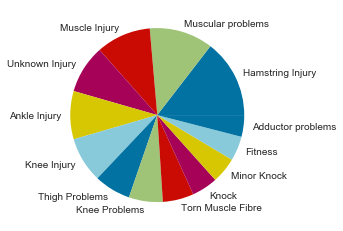

In [378]:
s[:13].plot(kind='pie', label='') #pie chart of the top 15 injuries within the dataset

In [379]:
df.head(3)


,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injuries,bmi
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","[(16/17, Meniscal Injury, 29)]",25.181077
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","[(18/19, Achilles tendon rupture, 314), (16/17...",24.810964
3,186590,John Stones,Manchester City,"1,14 Bill. €",1994-05-28,69.0,1.88,England,Defender - Centre-Back,right,"[(\nEverton , \nMan City , 16/17, Aug 9, 2016)...","[(18/19, Muscle Injury, 6), (17/18, Minor Knoc...",19.522408


In [380]:
s = df.apply(lambda x: pd.Series(x[11]),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'injuries'
df = df.drop(['injuries'], axis=1).join(s)
df.reset_index()
df.head()

## currently each row is a player with a list of injuries , we will "flatten" it to get a row per injur

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,bmi,injuries
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",25.181077,"(16/17, Meniscal Injury, 29)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(18/19, Achilles tendon rupture, 314)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(16/17, Disrupted Calf Muscle, 57)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(15/16, Calf Injury, 17)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(15/16, Torn muscle bundle, 24)"


In [381]:
df.shape

(12572, 13)

In [382]:
df = df.reset_index(drop=True)
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,bmi,injuries
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",25.181077,"(16/17, Meniscal Injury, 29)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(18/19, Achilles tendon rupture, 314)"
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(16/17, Disrupted Calf Muscle, 57)"
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(15/16, Calf Injury, 17)"
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,"(15/16, Torn muscle bundle, 24)"


In [383]:
df = df[df['injuries'].notnull()]
df.shape

(12212, 13)

In [384]:
# The injury is currently describe as a tuple, the researcher will create 3 new columns instead of injurie column 
#  * season of the injury
#  * type of the injury
#  * recovery time (in days)
#   --------


In [385]:
df_injurie = pd.DataFrame(df['injuries'].tolist(), index=df.index)
df_injurie.shape


(12212, 3)

In [386]:
df = df.drop('injuries', axis=1).join(df_injurie)
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,bmi,0,1,2
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",25.181077,16/17,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,18/19,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,16/17,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,15/16,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,15/16,Torn muscle bundle,24


In [387]:
df = df.rename(index=str, columns={0: "season", 1: "type" , 2 : "severity"})
df.head()


,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,bmi,season,type,severity
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",25.181077,16/17,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,18/19,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,16/17,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,15/16,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",24.810964,15/16,Torn muscle bundle,24


In [388]:
del df['transfers']
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,25.181077,16/17,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,18/19,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,16/17,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,15/16,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,15/16,Torn muscle bundle,24


In [389]:
import datetime #researcher is adding a new column " age "; also know as the age of the player at the specific injury

In [390]:
df.season = df.season.apply(lambda x : '20' + x[3:] + '-01-01')
#df['season of transfer to current team'] = df['season of transfer to current team'].apply(lambda x : '20' + x[3:] + '-01-01')

df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,25.181077,2017-01-01,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2019-01-01,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2017-01-01,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2016-01-01,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2016-01-01,Torn muscle bundle,24


In [391]:
def injuries_age(season,birth):
    return datetime.datetime.strptime(season, '%Y-%m-%d').year - datetime.datetime.strptime(birth, '%Y-%m-%d').year

#def yrs_since_trans(season,birth):
    #return datetime.datetime.strptime(season, '%Y-%m-%d').year - datetime.datetime.strptime(birth, '%Y-%m-%d').year


In [392]:
df['age'] = df.apply(lambda x : injuries_age(x['season'], x['birth']), axis=1)
#df['years since transfer'] = df.apply(lambda x : yrs_since_trans(x['season'], x['season of transfer to current team']), axis=1)
df.head(1)

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,25.181077,2017-01-01,Meniscal Injury,29,24


In [393]:
# [#] = TYPE
# [$] = LOC + MAIN


-------

## MAKING THE DATA SET WE WILL BE USING FOR ANALYSIS!

In [394]:
df85 = df[df['type'] == 'Hamstring Injury'] # type loc main
df86 = df[df['type'] == 'Thigh Problems'] # type loc main
df87 = df[df['type'] == 'Adductor problems'] #type loc main
df88 = df[df['type'] == 'Cruciate Ligament Rupture'] #type loc main
df89 = df[df['type'] == 'Calf Injury'] #loc #main #type  muscle
df90 = df[df['type'] == 'Thigh Muscle Strain'] #loc #main #type  muscle
df91 = df[df['type'] == 'Calf Problems'] #loc #main #type  muscle
df92 = df[df['type'] == 'Tear in the abductor muscle'] #type loc main
df93 = df[df['type'] == 'Groin Injury'] #loc #main #type  muscle
df94 = df[df['type'] == 'Achilles tendon problems'] #loc #main #type  muscle
df95 = df[df['type'] == 'groin strain'] #loc #main #type  muscle
df96 = df[df['type'] == 'Biceps femoris muscle injury'] #loc #main #type  muscle
df97 = df[df['type'] == 'Concussion'] #type loc main
df98 = df[df['type'] == 'Distortion of the ankle'] #loc #main #type  muscle
df99 = df[df['type'] == 'Sprained ankle']# loc main type
df100 = df[df['type'] == 'Bruised Knee'] #type loc main
df101 = df[df['type'] == 'Metatarsal Fracture'] #type loc
df102 = df[df['type'] == 'Meniscal Injury'] #type loc main
df103 = df[df['type'] == 'Nasal Bone Fracture'] #type loc main
df104 = df[df['type'] == 'Bruised Foot'] #type loc main
df105 = df[df['type'] == 'Bruised Rib'] #type loc main
df106 = df[df['type'] == 'Pulled hamstring at the adductors'] #type loc main
df107 = df[df['type'] == 'Calf Strain'] #type loc main
df108 = df[df['type'] == 'Groin Strain'] #type loc main
df109 = df[df['type'] == 'Calf muscle strain'] #type loc main
df110 = df[df['type'] == 'Sprained Ankle'] #type loc main
df_type_ill1 = df[df['type'] == 'Influenza'] #type loc main
df_type_ill2 = df[df['type'] == 'Ill'] #type loc main
df_type_ill3 = df[df['type'] == 'Cold'] #type loc main
df_type_ill4 = df[df['type'] == 'Abdominal Influenza'] #type loc main
df_type_ill5 = df[df['type'] == 'Flu'] #type loc main
df_type_ill6 = df[df['type'] == 'Fever'] #type loc main
df_type_ill7 = df[df['type'] == 'Infection'] #type loc main








In [395]:
df85['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df86['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df87['type (general)'] = 'Muscle rupture/tear/strain/cramps' #groin abd = hip
df88['type (general)'] = 'Sprain/ligament injury' #groin abd = hip
df89['type (general)'] = 'Muscle rupture/tear/strain/cramps' #groin abd = hip
df90['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df91['type (general)'] = 'Muscle rupture/tear/strain/cramps' #groin abd = hip
df92['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df93['type (general)'] = 'Muscle rupture/tear/strain/cramps' #groin abd = hip
df94['type (general)'] = 'Tendon injury/rupture/tendinosis/bursitis' #achilles
df95['type (general)'] = 'Muscle rupture/tear/strain/cramps' #groin abd = hipten
df96['type (general)'] = 'Muscle rupture/tear/strain/cramps' #groin abd = hip
df97['type (general)'] = 'Concussion'
df98['type (general)'] = 'Sprain/ligament injury'
df99['type (general)'] = 'Sprain/ligament injury' #groin abd = hip
df100['type (general)'] = 'Haematoma/contusion/bruise'
df101['type (general)'] = 'Fracture'
df102['type (general)'] = 'Lesion of meniscus or cartilage'
df103['type (general)'] = 'Fracture'
df104['type (general)'] = 'Haematoma/contusion/bruise'
df105['type (general)'] = 'Haematoma/contusion/bruise'
df106['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df107['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df108['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df109['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df110['type (general)'] = 'Sprain/ligament injury'

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [396]:
df85['location'] = 'Thigh'
df86['location'] = 'Thigh'
df87['location'] = 'Hip/groin'
df88['location'] = 'Knee'
df89['location'] = 'Lower leg/Achilles tendon' #groin abd = hip
df90['location'] = 'Thigh'
df91['location'] = 'Lower leg/Achilles tendon' #groin abd = hip
df92['location'] = 'Hip/groin'
df93['location'] = 'Hip/groin' #groin abd = hip
df94['location'] = 'Lower leg/Achilles tendon'
df95['location'] = 'Hip/groin' #groin abd = hip
df96['location'] = 'Thigh'
df97['location'] = 'Head/face' #groin abd = hip
df98['location'] = 'Ankle' #foot
df99['location'] = 'Ankle' #achilles
df100['location'] = 'Knee' #groin abd = hipten
df101['location'] = 'Foot/toe'
df102['location'] = 'Knee' #groin abd = hip
df103['location'] = 'Head/face'
df104['location'] = 'Foot/toe' #groin abd = hip
df105['location'] = 'Sternum/ribs/upper back'
df106['location'] = 'Thigh' #groin abd = hip
df107['location'] = 'Lower leg/Achilles tendon'
df108['location'] = 'Hip/groin' #groin abd = hip
df109['location'] = 'Lower leg/Achilles tendon'
df110['location'] = 'Ankle'

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [397]:
df85['main'] = 'Lower limb'
df86['main'] = 'Lower limb'
df87['main'] = 'Lower limb' #groin abd = hip
df88['main'] = 'Lower limb' #groin abd = hip
df89['main'] = 'Lower limb' #groin abd = hip
df90['main'] = 'Lower limb'
df91['main'] = 'Lower limb' #groin abd = hip
df92['main'] = 'Lower limb'
df93['main'] = 'Lower limb' #groin abd = hip
df94['main'] = 'Lower limb' #achilles
df95['main'] = 'Lower limb' #groin abd = hipten
df96['main'] = 'Lower limb' #groin abd = hip
df97['main'] = 'Head and neck'
df98['main'] = 'Lower limb'
df99['main'] = 'Lower limb' #groin abd = hip
df100['main'] = 'Lower limb'
df101['main'] = 'Lower limb'
df102['main'] = 'Lower limb'
df103['main'] = 'Head and neck'
df104['main'] = 'Lower limb'
df105['main'] = 'Trunk'
df106['main'] = 'Lower limb'
df107['main'] = 'Lower limb'
df108['main'] = 'Lower limb'
df109['main'] = 'Lower limb'
df110['main'] = 'Lower limb'

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

-------

# MAKING A DATAFRAME FOR ILLNESS IN ELITE ADULTS AND YOUTHS

In [398]:
dfillness = pd.concat([df_type_ill1,df_type_ill2,df_type_ill3,df_type_ill4
,df_type_ill5,df_type_ill6,df_type_ill7],ignore_index=True)


In [399]:
dfillness.shape

(713, 15)

In [400]:
dfillness['season'].value_counts()

2018-01-01    183
2019-01-01    122
2017-01-01    122
2016-01-01     82
2015-01-01     80
2013-01-01     37
2014-01-01     35
2011-01-01     22
2012-01-01     21
2010-01-01      6
2009-01-01      3
Name: season, dtype: int64

In [401]:
dfillness = dfillness[dfillness['severity'] != '?']

In [402]:
dfillness = dfillness[dfillness['season'] != '2007-01-01']


In [403]:
dfillness['severity'].astype(int).sum()

4556

In [404]:
dfillness['age'].unique()

array([26, 23, 21, 24, 22, 25, 30, 20, 38, 37, 28, 27, 32, 31, 34, 29, 18,
       19, 33, 35, 17, 36, 39])

In [405]:
# EXCEL 
dfillness['age'].value_counts()

23    75
25    74
22    59
26    57
24    53
28    49
27    46
20    45
29    45
21    45
31    39
30    34
32    24
19    22
34    16
33    15
35     5
36     3
18     2
39     1
38     1
37     1
17     1
Name: age, dtype: int64

In [406]:
# ILLNESS FOR YOUTHS ONLY

dfillness_youthel = dfillness.loc[(dfillness['age'] >= 16) & (dfillness['age'] <= 19)]
dfillness_youthel['age'].value_counts()
dfillness_youthel.shape

dfillnessa = dfillness[dfillness['age'] != 17]
dfillnessad = dfillnessa[dfillnessa['age'] != 18]
dfillness_adultel = dfillnessad[dfillnessad['age'] != 19]

In [407]:
# ILLNESS FOR ADULTS ONLY
dfillness_adultel.shape

(687, 15)

In [408]:
dfillness_youthel.head(2)

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age
52,196357,Jonathan Tah,Bayer 04 Leverkusen,"387,25 Mill. €",1996-02-11,90.0,1.95,Germany,Defender - Centre-Back,right,23.668639,2014-01-01,Influenza,14,18
76,57051,Sebastian Rudy,FC Schalke 04,"239,80 Mill. €",1990-02-28,74.0,1.79,Germany,Midfielder - Defensive Midfield,right,23.095409,2009-01-01,Influenza,11,19


In [409]:
dfillness_youthel.loc[dfillness_youthel['severity'].astype(int) == 0, 'ranked severity'] = 'Slight'
dfillness_youthel.loc[(dfillness_youthel['severity'].astype(int) >= 1) & (dfillness_youthel['severity'].astype(int) <= 3), 'ranked severity'] = 'Minimal'
dfillness_youthel.loc[(dfillness_youthel['severity'].astype(int) >= 4) & (dfillness_youthel['severity'].astype(int) <= 7), 'ranked severity'] = 'Mild'
dfillness_youthel.loc[(dfillness_youthel['severity'].astype(int) >= 8) & (dfillness_youthel['severity'].astype(int) <= 28), 'ranked severity'] = 'Moderate'
dfillness_youthel.loc[dfillness_youthel['severity'].astype(int) > 28, 'ranked severity'] = 'Severe'

dfillness_youthel.loc[dfillness_youthel['ranked severity'] == 'Slight', 'recording regime'] = 'Medical Attention'
dfillness_youthel.loc[dfillness_youthel['ranked severity'] == 'Minimal', 'recording regime'] = 'Time-loss'
dfillness_youthel.loc[dfillness_youthel['ranked severity'] == 'Mild', 'recording regime'] = 'Time-loss'
dfillness_youthel.loc[dfillness_youthel['ranked severity'] == 'Moderate', 'recording regime'] = 'Time-loss'
dfillness_youthel.loc[dfillness_youthel['ranked severity'] == 'Severe', 'recording regime'] = 'Time-loss'






/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [410]:
dfillness_adultel.loc[dfillness_adultel['severity'].astype(int) == 0, 'ranked severity'] = 'Slight'
dfillness_adultel.loc[(dfillness_adultel['severity'].astype(int) >= 1) & (dfillness_adultel['severity'].astype(int) <= 3), 'ranked severity'] = 'Minimal'
dfillness_adultel.loc[(dfillness_adultel['severity'].astype(int) >= 4) & (dfillness_adultel['severity'].astype(int) <= 7), 'ranked severity'] = 'Mild'
dfillness_adultel.loc[(dfillness_adultel['severity'].astype(int) >= 8) & (dfillness_adultel['severity'].astype(int) <= 28), 'ranked severity'] = 'Moderate'
dfillness_adultel.loc[dfillness_adultel['severity'].astype(int) > 28, 'ranked severity'] = 'Severe'

dfillness_adultel.loc[dfillness_adultel['ranked severity'] == 'Slight', 'recording regime'] = 'Medical Attention'
dfillness_adultel.loc[dfillness_adultel['ranked severity'] == 'Minimal', 'recording regime'] = 'Time-loss'
dfillness_adultel.loc[dfillness_adultel['ranked severity'] == 'Mild', 'recording regime'] = 'Time-loss'
dfillness_adultel.loc[dfillness_adultel['ranked severity'] == 'Moderate', 'recording regime'] = 'Time-loss'
dfillness_adultel.loc[dfillness_adultel['ranked severity'] == 'Severe', 'recording regime'] = 'Time-loss'





In [411]:
dfillness_youthel.head(2)

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age,ranked severity,recording regime
52,196357,Jonathan Tah,Bayer 04 Leverkusen,"387,25 Mill. €",1996-02-11,90.0,1.95,Germany,Defender - Centre-Back,right,23.668639,2014-01-01,Influenza,14,18,Moderate,Time-loss
76,57051,Sebastian Rudy,FC Schalke 04,"239,80 Mill. €",1990-02-28,74.0,1.79,Germany,Midfielder - Defensive Midfield,right,23.095409,2009-01-01,Influenza,11,19,Moderate,Time-loss


In [412]:
generalilly = dfillness_youthel[dfillness_youthel.duplicated(
    ['id'])] # = 

d = generalilly['id'].nunique() #NOT SLOW TIME IN THEIR CAREERS; not alot of games(not up the ranks;
# not as musch phsycal stress)
# THEY ARE TRYPICALLY ON LOW RANKING TEAMS characterized by bad skills
#; they are  developing skill and physiological characteristics as they age from U17-U20
#
print('There is '+ str(d) + 
' youth player with general reccurance, meaning they had an UPPER RESPIRATORY or GASTROINTESTINAL INFECTION occuring throughout seasons or within the same season(s)' )

There is 1 youth player with general reccurance, meaning they had an UPPER RESPIRATORY or GASTROINTESTINAL INFECTION occuring throughout seasons or within the same season(s)


In [413]:
generalilla = dfillness_adultel[dfillness_adultel.duplicated(
    ['id'])] # = 

soo = generalilla['id'].nunique()#NOT SLOW TIME IN THEIR CAREERS; not alot of games(not up the ranks;
e = generalilla['id'].unique()
# not as musch phsycal stress)
# THEY ARE TRYPICALLY ON LOW RANKING TEAMS characterized by bad skills
#; they are  developing skill and physiological characteristics as they age from U17-U20
#
print('There is '+ str(soo) + 
' adult players with general reccurance, meaning they had an UPPER RESPIRATORY or GASTROINTESTINAL INFECTION occuring throughout seasons or within the same season(s)' )

There is 153 adult players with general reccurance, meaning they had an UPPER RESPIRATORY or GASTROINTESTINAL INFECTION occuring throughout seasons or within the same season(s)


In [414]:
dfillness_adultel.shape

(687, 17)

In [415]:
farai = dfillness_adultel[dfillness_adultel['id'].isin(e)]

farai['reccurance'] = 'True'
og = dfillness_adultel[~dfillness_adultel['id'].isin(e)]
og.head()
og['reccurance'] = 'False'


/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [416]:
adulteliteill = pd.concat([farai,og], ignore_index = True)

In [417]:
adulteliteill['reccurance'].value_counts()

True     401
False    286
Name: reccurance, dtype: int64

In [418]:
fi = dfillness_youthel[dfillness_youthel['id'].isin(e)]

fi['reccurance'] = 'True'
fai = dfillness_youthel[~dfillness_youthel['id'].isin(e)]
fai.head()
fai['reccurance'] = 'False'



/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [419]:
youtheliteill = pd.concat([fi,fai], ignore_index = True)

In [420]:
youtheliteill.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age,ranked severity,recording regime,reccurance
0,196357,Jonathan Tah,Bayer 04 Leverkusen,"387,25 Mill. €",1996-02-11,90.0,1.95,Germany,Defender - Centre-Back,right,23.668639,2014-01-01,Influenza,14,18,Moderate,Time-loss,True
1,57051,Sebastian Rudy,FC Schalke 04,"239,80 Mill. €",1990-02-28,74.0,1.79,Germany,Midfielder - Defensive Midfield,right,23.095409,2009-01-01,Influenza,11,19,Moderate,Time-loss,True
2,187491,Timo Baumgartl,VfB Stuttgart,"160,20 Mill. €",1996-03-04,80.0,1.90,Germany,Defender - Centre-Back,right,22.160665,2015-01-01,Influenza,7,19,Mild,Time-loss,True
3,315779,Christian Pulisic,Borussia Dortmund,"602,30 Mill. €",1998-09-18,63.0,1.72,United States,Forward - Right Winger,right,21.295295,2017-01-01,Ill,3,19,Minimal,Time-loss,True
4,315779,Christian Pulisic,Borussia Dortmund,"602,30 Mill. €",1998-09-18,63.0,1.72,United States,Forward - Right Winger,right,21.295295,2016-01-01,Infection,7,18,Mild,Time-loss,True


## GETTING TYPE FOR ILLNESS

In [421]:
dfillness['type'].value_counts()
# INFECTION, Cold, Fever, Influenza, Flu = Respiratory tract
# Abdominal Influenza = Gastrointestinal
# Ill = Unexplained illness

Influenza              181
Ill                    156
Cold                    91
Abdominal Influenza     87
Flu                     81
Fever                   61
Infection               55
Name: type, dtype: int64

In [422]:
# adult

        
adulteliteill.loc[adulteliteill['type'] == 'Influenza', 'type (general)'] = 'U/L Respiratory tract'
adulteliteill.loc[adulteliteill['type'] == 'Ill', 'type (general)'] = 'Unexplained Illness'
adulteliteill.loc[adulteliteill['type'] == 'Cold', 'type (general)'] = 'U Respiratory tract'
adulteliteill.loc[adulteliteill['type'] == 'Abdominal Influenza', 'type (general)'] = 'Gastrointestinal'
adulteliteill.loc[adulteliteill['type'] == 'Flu', 'type (general)'] = 'U/L Respiratory tract'
adulteliteill.loc[adulteliteill['type'] == 'Fever', 'type (general)'] = 'Unexplained Infection'
adulteliteill.loc[adulteliteill['type'] == 'Infection', 'type (general)'] = 'Unexplained Infection'








   

In [423]:
# youth 
       
youtheliteill.loc[youtheliteill['type'] == 'Influenza', 'type (general)'] = 'U/L Respiratory tract'
youtheliteill.loc[youtheliteill['type'] == 'Ill', 'type (general)'] = 'Unexplained Illness'
youtheliteill.loc[youtheliteill['type'] == 'Cold', 'type (general)'] = 'U Respiratory tract'
youtheliteill.loc[youtheliteill['type'] == 'Abdominal Influenza', 'type (general)'] = 'Gastrointestinal'
youtheliteill.loc[youtheliteill['type'] == 'Flu', 'type (general)'] = 'U/L Respiratory tract'
youtheliteill.loc[youtheliteill['type'] == 'Fever', 'type (general)'] = 'Unexplained Infection'
youtheliteill.loc[youtheliteill['type'] == 'Infection', 'type (general)'] = 'Unexplained Infection'





In [424]:
adulteliteill.head(3)

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age,ranked severity,recording regime,reccurance,type (general)
0,53622,Ilkay Gündogan,Manchester City,"1,14 Bill. €",1990-10-24,78.0,1.80,Germany,Midfielder - Central Midfield,right,24.074074,2016-01-01,Influenza,7,26,Mild,Time-loss,True,U/L Respiratory tract
1,50362,Fabian Delph,Manchester City,"1,14 Bill. €",1989-11-21,60.0,1.74,England,Midfielder - Central Midfield,left,19.817677,2012-01-01,Influenza,4,23,Mild,Time-loss,True,U/L Respiratory tract
2,111455,Granit Xhaka,Arsenal FC,"625,50 Mill. €",1992-09-27,82.0,1.85,Switzerland,Midfielder - Defensive Midfield,left,23.959094,2014-01-01,Influenza,4,22,Mild,Time-loss,True,U/L Respiratory tract


In [425]:
illness_fin = pd.concat([adulteliteill,youtheliteill], ignore_index=True)

In [426]:
illness_fin.shape

(712, 19)

In [427]:
illness_fin['club_value'] = illness_fin['club_value'].apply(lambda x : x.split(",")[0]).astype(int)

illness_fin['club_value'] = illness_fin['club_value'].apply(lambda x : 1000 if x == 1 else x).astype(int)

In [428]:
illness_fin['severity'] = illness_fin['severity'].astype(int)

(0, 1000)

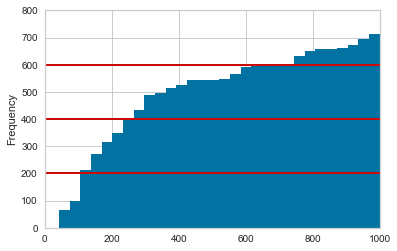

In [429]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111)
illness_fin['club_value'].plot(kind='hist',bins=30,cumulative=True,ax=ax)
plt.plot([0,1000], [200,200], 'r-', lw=2)
plt.plot([0,1000], [400,400], 'r-', lw=2)
plt.plot([0,1000], [600,600], 'r-', lw=2)

ax.set_ylim((0,800))
ax.set_xlim((0,1000))



In [430]:
def club_to_categoryPLOT(value):
    if 0 < value <=  75 :
        return '0 to 75 Million'
    if 75 < value <= 125 :
        return '76 to 125 Million'
    if 125 < value <= 225 :
        return '126 to 225 Million'
    if 225 < value <= 275 :
        return '226 to 275 Million'
    if 275 < value <= 600 :
        return '176 to 600 Million'
    else :
        return 'Over 601 Million'

In [431]:
#PLOTS FOR PAPER

In [432]:
#illness

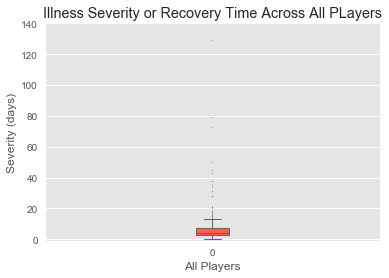

In [433]:
# Draw a vertical boxplot grouped  
# by a categorical variable: 
plt.style.use('ggplot')

bplot = sns.boxplot( 
                 data=illness_fin['severity'], 
                 width=.1,
                 color="tomato",
                 saturation=500,
                 fliersize=1,
                linewidth=1.0)



plt.ylim(-1,140)
plt.ylabel('Severity (days)')
plt.xlabel('All Players')
plt.title('Illness Severity or Recovery Time Across All PLayers')
plt.show()

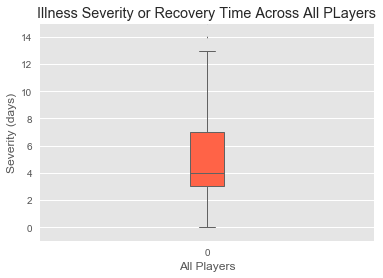

In [434]:
# Draw a vertical boxplot grouped  
# by a categorical variable: 
plt.style.use('ggplot')

bplot = sns.boxplot( 
                 data=illness_fin['severity'], 
                 width=.1,
                 color="tomato",
                 saturation=500,
                 fliersize=1,
                linewidth=1.0)



plt.ylim(-1,15)
plt.ylabel('Severity (days)')
plt.xlabel('All Players')
plt.title('Illness Severity or Recovery Time Across All PLayers')
plt.show()

Text(0.5, 1.0, 'Ranked Severities Across All Ill Players')

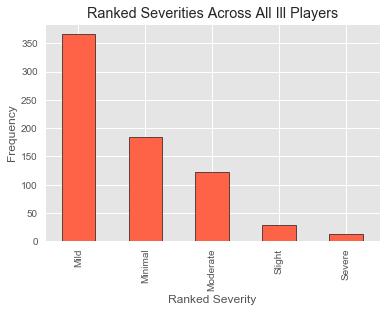

In [435]:
plt.style.use('ggplot')

illness_fin['ranked severity'].value_counts().plot(kind='bar', 
                                                  color='tomato',
                                                  edgecolor='black',
                                                  lw=.6, )
plt.xlabel('Ranked Severity')
plt.ylabel('Frequency')
plt.title('Ranked Severities Across All Ill Players')

In [436]:
illness_fin['severity'].describe()

count    712.000000
mean       6.398876
std        7.983168
min        0.000000
25%        3.000000
50%        4.000000
75%        7.000000
max      129.000000
Name: severity, dtype: float64

Text(0, 0.5, '(%) Frequency')

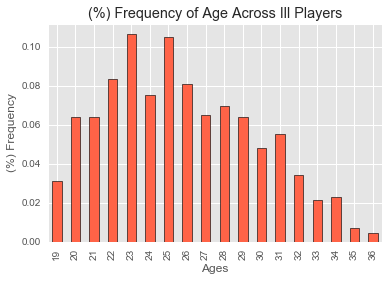

In [437]:
plt.style.use('ggplot')

illness_fin[(illness_fin['age'] > 18) & (illness_fin['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',style=None,lw=.6,
edgecolor='black',label='Counts (# of injuries)',color='tomato')

plt.title('(%) Frequency of Age Across Ill Players')

plt.xlabel('Ages') #time rolly
plt.ylabel('(%) Frequency')



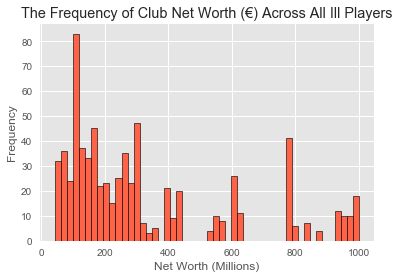

In [438]:
plt.style.use('ggplot')

illness_fin['club_value'].plot(kind='hist',bins=50,lw=.6,
edgecolor='black',label='Counts (# of injuries)',color='tomato')

plt.title('The Frequency of Club Net Worth (€) Across All Ill Players')
plt.ylabel('Frequency')
plt.xlabel('Net Worth (Millions)')
plt.show()

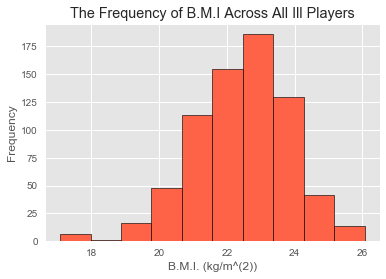

In [439]:
plt.style.use('ggplot')

illness_fin['bmi'].plot(kind='hist',edgecolor='black', lw=.6,label='Counts (# of injuries)',color='tomato')
plt.title('The Frequency of B.M.I Across All Ill Players')
plt.ylabel('Frequency')
plt.xlabel('B.M.I. (kg/m^(2))')
plt.show() #yucky deku



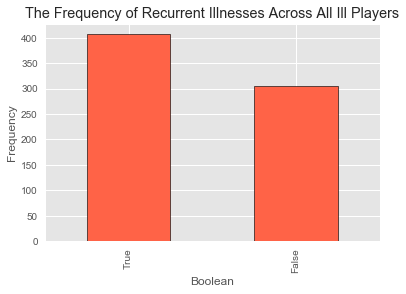

In [440]:
plt.style.use('ggplot')

kiki = illness_fin[illness_fin['reccurance']!='NaN']
kiki['reccurance'].unique()

kiki['reccurance'].value_counts().plot(kind='bar',edgecolor='black', lw=.6,label='Counts (# of injuries) ',color='tomato')
plt.title('The Frequency of Recurrent Illnesses Across All Ill Players')
plt.ylabel('Frequency')
plt.xlabel('Boolean')
plt.show() #yucky deku



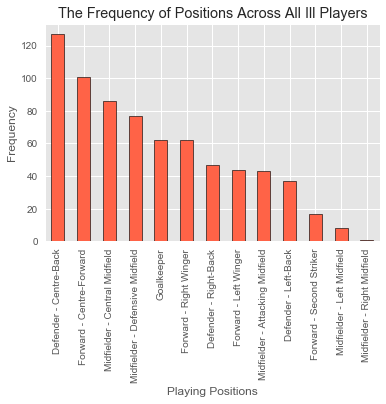

In [441]:
plt.style.use('ggplot')

illness_fin['role'].value_counts().plot(kind='bar',edgecolor='black', lw=.6,label='Counts (# of injuries)',color='tomato')
plt.title('The Frequency of Positions Across All Ill Players')
plt.ylabel('Frequency')
plt.xlabel('Playing Positions')

plt.show() #yucky deku



In [442]:
illness_fin['club_value'] = illness_fin['club_value'].apply(club_to_categoryPLOT)

In [443]:
resp1 = illness_fin[illness_fin['type (general)'] == 'U/L Respiratory tract']
resp = illness_fin[illness_fin['type (general)'] == 'U Respiratory tract']

r = pd.concat([resp1, resp], axis=0)
r = r.replace('U Respiratory tract','Respiratory tract')
r = r.replace('U/L Respiratory tract','Respiratory tract')

r = r.rename(columns={'severity': 'Average Severity (days)',
                                 'club_value': 'Club Net Worth (€)'})

In [444]:
illness_fin = illness_fin.rename(columns={'severity': 'Average Severity (days)',
                                 'club_value': 'Club Net Worth (€)'})

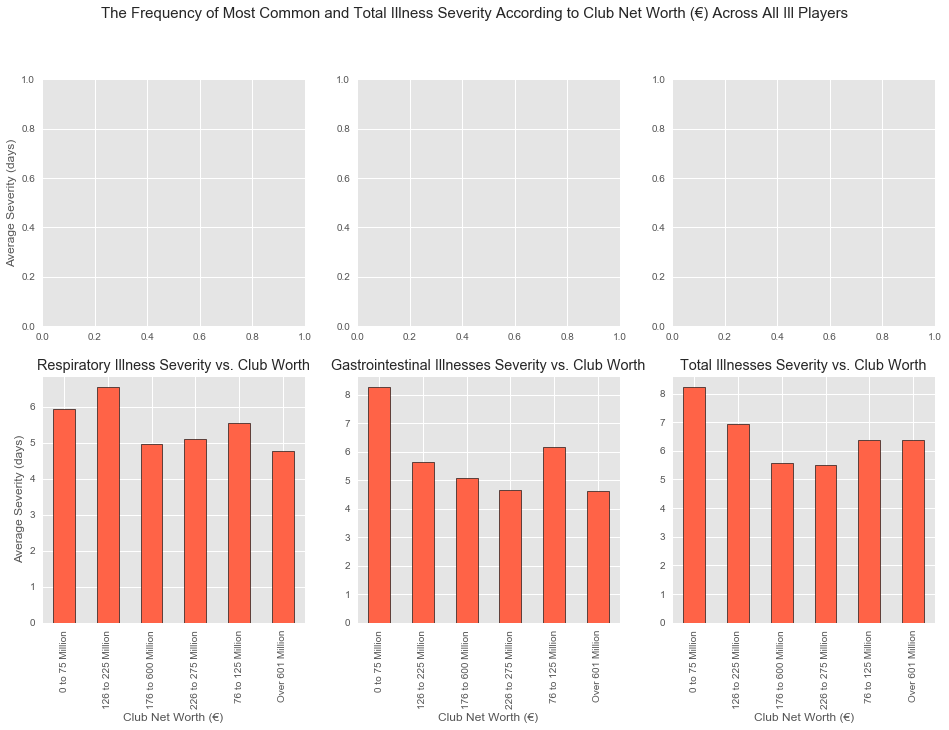

In [445]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10,))
fig.suptitle('The Frequency of Most Common and Total Illness Severity According to Club Net Worth (€) Across All Ill Players', fontsize=15)

a = r.groupby('type (general)').get_group('Respiratory tract').groupby('Club Net Worth (€)').mean()['Average Severity (days)'].plot(kind='bar',ax=axes[1,0],title="Respiratory Illness Severity vs. Club Worth",style=None,lw=.6, edgecolor='black',label='Counts (# of injuries)',color='tomato' )
b = illness_fin.groupby('type (general)').get_group('Gastrointestinal').groupby('Club Net Worth (€)').mean()['Average Severity (days)'].plot(kind='bar',ax=axes[1,1],title="Gastrointestinal Illnesses Severity vs. Club Worth",style=None,lw=.6, edgecolor='black',label='Counts (# of injuries)',color='tomato')
e = illness_fin.groupby('Club Net Worth (€)').mean()['Average Severity (days)'].plot(kind='bar',ax=axes[1,2],title="Total Illnesses Severity vs. Club Worth",style=None,lw=.6,
edgecolor='black',label='Counts (# of injuries)',color='tomato')

plt.setp(axes[-1, :], xlabel='Club Net Worth (€)')
plt.setp(axes[:, 0], ylabel='Average Severity (days)')
plt.show()

In [446]:
#injuries

Text(0, 0.5, '(%) Frequency')

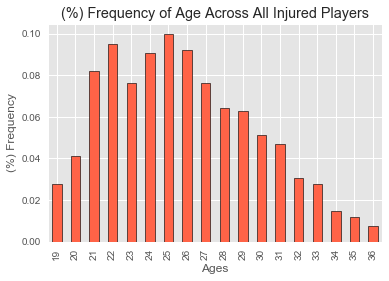

In [447]:
plt.style.use('ggplot')

df_recjcur[(illness_fin['age'] > 19) & (df_recjcur['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',style=None,lw=.6,
edgecolor='black',label='Counts (# of injuries)',color='tomato')

plt.title('(%) Frequency of Age Across All Injured Players')

plt.xlabel('Ages') #time rolly
plt.ylabel('(%) Frequency')



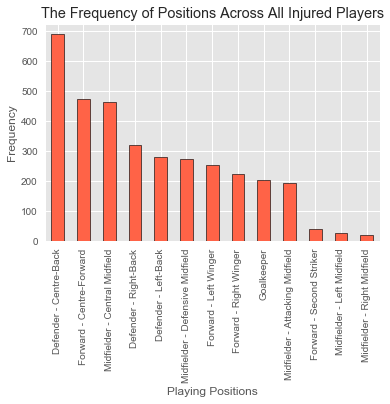

In [448]:
plt.style.use('ggplot')

colors = ['tomato']#'greenyellow','mediumturquoise','deepskyblue','plum','hotpink','deeppink','pink']

df_recjcur['role'].value_counts().plot(kind='bar',edgecolor='black', lw=.6,label='Counts (# of injuries)',color=colors)
plt.title('The Frequency of Positions Across All Injured Players')
plt.ylabel('Frequency')
plt.xlabel('Playing Positions')
plt.show() #yucky deku




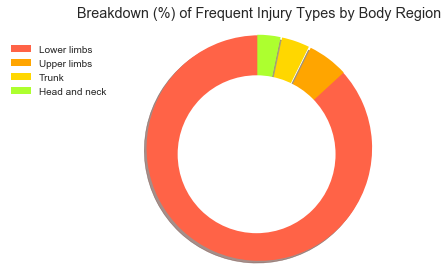

In [449]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')


explode = (-0.06,0.06,0.06,0.06)
labels = df_location_main['main'].unique()
sizes = df_location_main['main'].value_counts()
colors = ['tomato','orange','gold','greenyellow','mediumturquoise','deepskyblue','plum','hotpink','deeppink','pink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True,
                         explode=explode,
                         startangle=90,
                         pctdistance=90)

plt.legend(patches, labels, loc="best")

#explsion

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(patches, labels, bbox_to_anchor=(0, .95))

plt.title('Breakdown (%) of Frequent Injury Types by Body Region')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

In [450]:
num = np.array([0])
sqr = np.array([36.824536])

In [451]:
#SECONDARY ILLNESS PLOTS

In [452]:
resp = ["U/L Respiratory tract","U Respiratory tract",]
gas = ['Gastrointestinal']
#unexp = ['Unexplained Illness','Unexplained Infection']

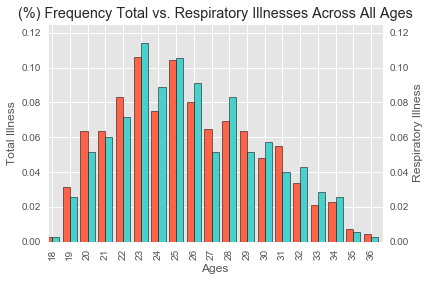

In [453]:
plt.style.use('ggplot')

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('(%) Frequency Total vs. Respiratory Illnesses Across All Ages')
width = 0.4

illness_fin[(illness_fin['age'] > 17) & (illness_fin['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar', color='tomato', ax=ax, width=width, position=1, edgecolor='black', lw=.5)
illness_fin[(illness_fin['type (general)'].isin(resp))& (illness_fin['age'] > 17) & (illness_fin['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='mediumturquoise', ax=ax2, width=width, position=0, edgecolor='black', lw=.5)



ax.set_ylabel('Total Illness')
ax2.set_ylabel('Respiratory Illness')
ax.set_xlabel('Ages')

##plt.rc('grid', linestyle="-", color='lightgrey')
#
#ax.grid()
ax2.grid()

ax.set_ylim((0,0.125))
ax2.set_ylim((0,0.125))

#plt.grid()
plt.show()

#24 resp
#26 gas

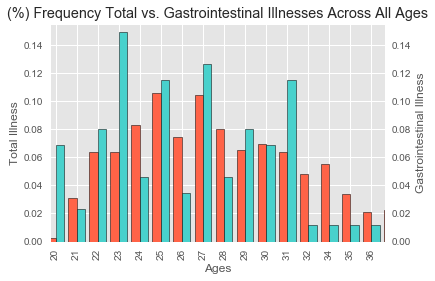

In [454]:
plt.style.use('ggplot')

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('(%) Frequency Total vs. Gastrointestinal Illnesses Across All Ages')
width = 0.4

illness_fin[(illness_fin['age'] > 17) & (illness_fin['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='tomato', ax=ax, width=width, position=1, edgecolor='black', lw=.5)
illness_fin[(illness_fin['type (general)'].isin(gas)
            )
   & (illness_fin['age'] > 17) & (illness_fin['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='mediumturquoise', ax=ax2, width=width, position=0, edgecolor='black', lw=.5)



ax.set_ylabel('Total Illness')
ax2.set_ylabel('Gastrointestinal Illness')
ax.set_xlabel('Ages')

##plt.rc('grid', linestyle="-", color='lightgrey')
#
#ax.grid()
ax2.grid()

ax.set_ylim((0,0.155))
ax2.set_ylim((0,0.155))

#plt.grid()
plt.show()

#24 resp
#26 gas

(0, 400)

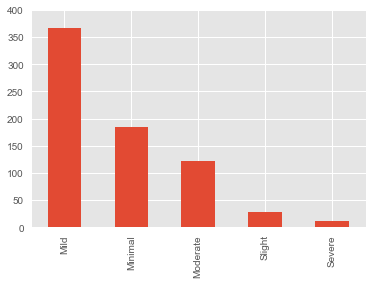

In [455]:
illness_fin['ranked severity'].value_counts().plot(kind='bar')
plt.ylim(0,400)

Text(0.5, 1.0, 'Time-loss and Medical Attention Illnesses Across All Ill Players')

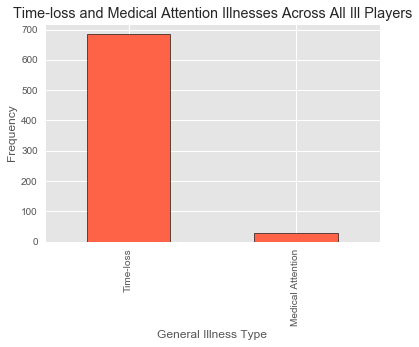

In [456]:
plt.style.use('ggplot')
illness_fin['recording regime'].value_counts().plot(kind='bar', 
                                                  color='tomato',
                                                  edgecolor='black',
                                                  lw=.6)
plt.xlabel('General Illness Type')
plt.ylabel('Frequency')
plt.title('Time-loss and Medical Attention Illnesses Across All Ill Players')

Text(0.5, 1.0, 'Ranked Severities Across All Injured Players')

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


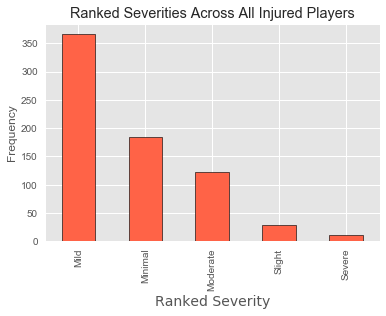

In [457]:
plt.style.use('ggplot')

illness_fin['ranked severity'].value_counts().plot(kind='bar', 
                                                  color='tomato',
                                                  edgecolor='black',
                                                  lw=.6, )
plt.xlabel('Ranked Severity',fontname='Ubuntu', fontsize=14)
plt.ylabel('Frequency')
plt.title('Ranked Severities Across All Injured Players')

Importantly, and similar to sprint performance, there was remarkable stabilization of muscle power capacity from U20 to senior, which was also noticed in a previous study involving these specific categories (Loturco et al., 2014). Although we observed a considerable increase in the total volume of neuromuscular training between these two age groups (Table 1)

Nevertheless, after analyzing the outcomes, we observed that the players presented meaningful increases of 10.4% and 11.5% (from U15 to U17 and from U17 to U20, respectively) in relative muscle power.

# In this sense, although we observed worthwhile increases in relative muscle power during 
# the players’ maturation (Figure 1), the evolution of speed performance seemed to be very inconsistent. 
# For instance, whereas we noticed meaningful physical improvements from U17 to U20



-------

In [458]:
df_type_location_main_w_VAR = pd.concat([df85,df86,df87,df88,df89,df90,df91,df92,df93
,df94,df95,df96,df97,df98,df99,df100,df101,df102,df103,df104,df105,df106,df107,df108,
df109,df110],ignore_index=True)

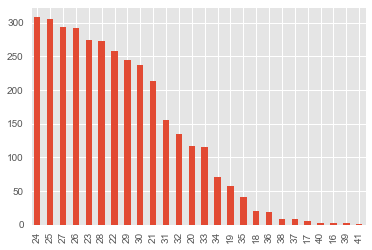

In [459]:
df_type_location_main_w_VAR['age'].value_counts().plot(kind='bar')

In [460]:
df_type_location_main_w_VAR.shape

(3460, 18)

In [461]:
df_type_location_main_w_VAR['age'].value_counts()

24    308
25    306
27    294
26    292
23    274
28    273
22    258
29    244
30    238
21    213
31    156
32    134
20    117
33    115
34     71
19     57
35     41
18     20
36     19
38      8
37      8
17      6
40      3
16      2
39      2
41      1
Name: age, dtype: int64

------

In [462]:
# GENERAL RECCURANCE COLUMN

In [463]:
reccurance = df_type_location_main_w_VAR[df_type_location_main_w_VAR.duplicated(
    ['id' ,'type (general)','location', 'name','role','foot','type'])] #id, name = person
    #NONSEASONALLY DEPENDENT ()

x = list(reccurance['id'].unique())
u = reccurance['id'].nunique()
print('There are '+ str(u) + 
' players with general reccurance, meaning they had an injury occuring throughout seasons or     within seasons' )

f = df_type_location_main_w_VAR[df_type_location_main_w_VAR['id'].isin(x)]

f['reccurance'] = 'True'
f['type (general)'].unique()

f.loc[f['type (general)'] == 'Concussion', 'reccurance'] = 'NaN'
f.loc[f['type (general)'] == 'Haematoma/contusion/bruise', 'reccurance'] = 'NaN'

oo = df_type_location_main_w_VAR[~df_type_location_main_w_VAR['id'].isin(x)]
oo.head()
oo['reccurance'] = 'False'
oo['type (general)'].unique()

oo['reccurance'].loc[oo['type (general)'] == 'Haematoma/contusion/bruise'] = 'NaN'
oo['reccurance'].loc[oo['type (general)'] == 'Concussion'] = 'NaN'

df_recjcur = pd.concat([oo,f],ignore_index=True )

There are 398 players with general reccurance, meaning they had an injury occuring throughout seasons or     within seasons


/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [464]:
df_recjcur['club_value'] = df_recjcur['club_value'].apply(lambda x : x.split(",")[0]).astype(int)

df_recjcur['club_value'] = df_recjcur['club_value'].apply(lambda x : 1000 if x == 1 else x).astype(int)

In [465]:
df_recjcur

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age,type (general),location,main,reccurance
0,186590,John Stones,Manchester City,1000,1994-05-28,69.0,1.88,England,Defender - Centre-Back,right,19.522408,2018-01-01,Hamstring Injury,42,24,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
1,90681,Eliaquim Mangala,Manchester City,1000,1991-02-13,74.0,1.87,France,Defender - Centre-Back,left,21.161600,2016-01-01,Hamstring Injury,49,25,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
2,157495,Benjamin Mendy,Manchester City,1000,1994-07-17,85.0,1.85,France,Defender - Left-Back,left,24.835646,2016-01-01,Hamstring Injury,24,22,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
3,192565,Leroy Sané,Manchester City,1000,1996-01-11,65.0,1.84,Germany,Forward - Left Winger,left,19.198960,2017-01-01,Hamstring Injury,31,21,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
4,134425,Raheem Sterling,Manchester City,1000,1994-12-08,63.0,1.70,England,Forward - Right Winger,right,21.799308,2018-01-01,Hamstring Injury,26,24,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
5,363205,Gabriel Jesus,Manchester City,1000,1997-04-03,73.0,1.75,Brazil,Forward - Centre-Forward,right,23.836735,2019-01-01,Hamstring Injury,12,22,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
6,82105,Joel Matip,Liverpool FC,950,1991-08-08,89.0,1.95,Cameroon,Defender - Centre-Back,right,23.405654,2018-01-01,Hamstring Injury,92,27,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
7,200512,Sadio Mané,Liverpool FC,950,1992-04-10,69.0,1.74,Senegal,Forward - Left Winger,right,22.790329,2018-01-01,Hamstring Injury,24,26,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
8,86792,Xherdan Shaqiri,Liverpool FC,950,1991-10-10,72.0,1.69,Switzerland,Forward - Right Winger,left,25.209201,2016-01-01,Hamstring Injury,26,25,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False
9,131789,Roberto Firmino,Liverpool FC,950,1991-10-02,76.0,1.81,Brazil,Forward - Centre-Forward,right,23.198315,2016-01-01,Hamstring Injury,18,25,Muscle rupture/tear/strain/cramps,Thigh,Lower limb,False


In [466]:
def club(value):
    
    if value == "Defender - Centre-Back":
        return 1
    if value == "Defender - Left-Back":
        return 2
    if value == "Forward - Left Winger":
        return 3
    if value == "Forward - Right Winger":
        return 4
    if value == "Forward - Centre-Forward":
        return 5
    if value == "Defender - Right-Back":
        return 6
    if value == "Goalkeeper":
        return 7
    if value == "Midfielder - Defensive Midfield":
        return 8
    if value == "Midfielder - Central Midfield":
        return 9
    if value == "Midfielder - Attacking Midfield":
        return 10
    if value == "Midfielder - Right Midfield":
        return 11
    if value == "Midfielder - Left Midfield":
        return 12
    if value == "Forward - Second Striker":
        return 13

df_recjcur['role'] = df_recjcur['role'].apply(club)

def vectrecc(value):
    if value == "False":
        return 0
    if value == "True":
        return 1
df_recjcur['reccurance'] = df_recjcur['reccurance'].apply(vectrecc)

In [467]:
df_recjcur = df_recjcur.drop(['weight',],axis=1)

In [468]:
def typeo(value):
    if value == "Muscle rupture/tear/strain/cramps":
        return 1
    if value == "Sprain/ligament injury":
        return 2
    if value == "Tendon injury/rupture/tendinosis/bursitis":
        return 3
    if value == "Concussion":
        return 4
    if value == "Haematoma/contusion/bruise":
        return 5
    if value == "Fracture":
        return 6
    if value == "Lesion of meniscus or cartilage":
        return 7

df_recjcur['type (general)'] = df_recjcur['type (general)'].apply(typeo)

In [469]:
def typeo6(value):
    if value == "Thigh":
        return 1
    if value == "Hip/groin":
        return 2
    if value == "Knee":
        return 3
    if value == "Lower leg/Achilles tendon":
        return 4
    if value == "Ankle":
        return 5
    if value == "Foot/toe":
        return 6
    if value == "Head/face":
        return 7

df_recjcur['location'] = df_recjcur['location'].apply(typeo6)

In [470]:
df_recjcur['main'].unique()
def main(value):
    if value == "Lower limb":
        return 1
    if value == "Head and neck":
        return 2
    if value == "Trunk":
        return 3

df_recjcur['main'] = df_recjcur['main'].apply(main)

In [471]:
df_recjcur['foot'].unique()

array(['right', 'left', 'both'], dtype=object)

In [472]:
df_recjcur['severity'].astype(int).head()

0    42
1    49
2    24
3    31
4    26
Name: severity, dtype: int64

In [473]:
df_recjcur

,id,name,club,club_value,birth,height,country,role,foot,bmi,season,type,severity,age,type (general),location,main,reccurance
0,186590,John Stones,Manchester City,1000,1994-05-28,1.88,England,1,right,19.522408,2018-01-01,Hamstring Injury,42,24,1,1.0,1,0.0
1,90681,Eliaquim Mangala,Manchester City,1000,1991-02-13,1.87,France,1,left,21.161600,2016-01-01,Hamstring Injury,49,25,1,1.0,1,0.0
2,157495,Benjamin Mendy,Manchester City,1000,1994-07-17,1.85,France,2,left,24.835646,2016-01-01,Hamstring Injury,24,22,1,1.0,1,0.0
3,192565,Leroy Sané,Manchester City,1000,1996-01-11,1.84,Germany,3,left,19.198960,2017-01-01,Hamstring Injury,31,21,1,1.0,1,0.0
4,134425,Raheem Sterling,Manchester City,1000,1994-12-08,1.70,England,4,right,21.799308,2018-01-01,Hamstring Injury,26,24,1,1.0,1,0.0
5,363205,Gabriel Jesus,Manchester City,1000,1997-04-03,1.75,Brazil,5,right,23.836735,2019-01-01,Hamstring Injury,12,22,1,1.0,1,0.0
6,82105,Joel Matip,Liverpool FC,950,1991-08-08,1.95,Cameroon,1,right,23.405654,2018-01-01,Hamstring Injury,92,27,1,1.0,1,0.0
7,200512,Sadio Mané,Liverpool FC,950,1992-04-10,1.74,Senegal,3,right,22.790329,2018-01-01,Hamstring Injury,24,26,1,1.0,1,0.0
8,86792,Xherdan Shaqiri,Liverpool FC,950,1991-10-10,1.69,Switzerland,4,left,25.209201,2016-01-01,Hamstring Injury,26,25,1,1.0,1,0.0
9,131789,Roberto Firmino,Liverpool FC,950,1991-10-02,1.81,Brazil,5,right,23.198315,2016-01-01,Hamstring Injury,18,25,1,1.0,1,0.0


In [474]:
df_recjcur[df_recjcur['type']=='Bruised Rib']

,id,name,club,club_value,birth,height,country,role,foot,bmi,season,type,severity,age,type (general),location,main,reccurance
1559,146164,Max Meyer,Crystal Palace,266,1995-09-18,1.73,Germany,10,right,20.047446,2017-01-01,Bruised Rib,4,22,5,NaN,3,NaN
1560,41112,José Holebas,Watford FC,181,1984-06-27,1.84,Greece,2,left,23.334121,2015-01-01,Bruised Rib,14,31,5,NaN,3,NaN
1561,55125,Chris Löwe,Huddersfield Town,121,1989-04-16,1.73,Germany,2,left,21.718066,2013-01-01,Bruised Rib,7,24,5,NaN,3,NaN
1562,161869,Djibril Sidibé,AS Monaco,305,1992-07-29,1.82,France,6,right,21.434609,2017-01-01,Bruised Rib,3,25,5,NaN,3,NaN
1563,68864,Kevin Strootman,Olympique Marseille,266,1990-02-13,1.86,Netherlands,9,left,23.124061,2018-01-01,Bruised Rib,13,28,5,NaN,3,NaN
1564,28335,Christophe Jallet,OGC Nice,145,1983-10-31,1.78,France,6,right,22.093170,2016-01-01,Bruised Rib,21,33,5,NaN,3,NaN
1565,38253,Robert Lewandowski,Bayern Munich,772,1988-08-21,1.85,Poland,5,right,22.790358,2015-01-01,Bruised Rib,4,27,5,NaN,3,NaN
1566,29993,Sven Bender,Bayer 04 Leverkusen,387,1989-04-27,1.86,Germany,1,right,20.811655,2018-01-01,Bruised Rib,0,29,5,NaN,3,NaN
1567,223974,Stefan Posch,TSG 1899 Hoffenheim,275,1997-05-14,1.88,Austria,1,right,21.502943,2018-01-01,Bruised Rib,4,21,5,NaN,3,NaN
1568,57051,Sebastian Rudy,FC Schalke 04,239,1990-02-28,1.79,Germany,8,right,23.095409,2017-01-01,Bruised Rib,4,27,5,NaN,3,NaN


Classification with correlated features: unreliability of feature ranking and solutions
Laura Toloşi,  Thomas Lengauer  Author Notes
Bioinformatics, Volume 27, Issue 14, 15 July 2011, Pages 1986–1994, https://doi.org/10.1093/bioinformatics/btr300
YOU DONT NEED CORRELATION! INFACT, suffer from correlation bias?

# RANKED REGIME FOR GENERAL DATAFRAME

In [475]:


df_recjcur.loc[df_recjcur['severity'].astype(int) == 0, 'ranked severity'] = 'Slight'
df_recjcur.loc[(df_recjcur['severity'].astype(int) >= 1) & (df_recjcur['severity'].astype(int) <= 3), 'ranked severity'] = 'Minimal'
df_recjcur.loc[(df_recjcur['severity'].astype(int) >= 4) & (df_recjcur['severity'].astype(int) <= 7), 'ranked severity'] = 'Mild'
df_recjcur.loc[(df_recjcur['severity'].astype(int) >= 8) & (df_recjcur['severity'].astype(int) <= 28), 'ranked severity'] = 'Moderate'
df_recjcur.loc[df_recjcur['severity'].astype(int) > 28, 'ranked severity'] = 'Severe'

df_recjcur.loc[df_recjcur['ranked severity'] == 'Slight', 'recording regime'] = 'Medical Attention'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Minimal', 'recording regime'] = 'Time-loss'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Mild', 'recording regime'] = 'Time-loss'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Moderate', 'recording regime'] = 'Time-loss'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Severe', 'recording regime'] = 'Time-loss'





In [476]:
 # cont here ----
df_recjcur.loc[df_recjcur['severity'].astype(int) == 0, 'ranked severity'] = 'Slight'
df_recjcur.loc[(df_recjcur['severity'].astype(int) >= 1) & (df_recjcur['severity'].astype(int) <= 3), 'ranked severity'] = 'Minimal'
df_recjcur.loc[(df_recjcur['severity'].astype(int) >= 4) & (df_recjcur['severity'].astype(int) <= 7), 'ranked severity'] = 'Mild'
df_recjcur.loc[(df_recjcur['severity'].astype(int) >= 8) & (df_recjcur['severity'].astype(int) <= 28), 'ranked severity'] = 'Moderate'
df_recjcur.loc[df_recjcur['severity'].astype(int) > 28, 'ranked severity'] = 'Severe'

df_recjcur.loc[df_recjcur['ranked severity'] == 'Slight', 'recording regime'] = 'Medical Attention'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Minimal', 'recording regime'] = 'Time-loss'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Mild', 'recording regime'] = 'Time-loss'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Moderate', 'recording regime'] = 'Time-loss'
df_recjcur.loc[df_recjcur['ranked severity'] == 'Severe', 'recording regime'] = 'Time-loss'








In [477]:
df_recjcur['ranked severity'].unique()

array(['Severe', 'Moderate', 'Mild', 'Slight', 'Minimal'], dtype=object)

In [478]:
df_recjcur = df_recjcur[df_recjcur['season'] != '2007-01-01']
df_recjcur = df_recjcur[df_recjcur['season'] != '2008-01-01']
aug = df_recjcur['severity'].astype(int).sum()
df_recjcur.shape



(3448, 20)

In [479]:
aug

126971

In [480]:
df_recjcur['season'].value_counts() #2009-2019

2018-01-01    719
2019-01-01    663
2017-01-01    611
2016-01-01    524
2015-01-01    351
2014-01-01    230
2013-01-01    165
2012-01-01     78
2011-01-01     54
2010-01-01     34
2009-01-01     19
Name: season, dtype: int64

In [481]:
#DONE!
df_recjcur.head()
#excel need 

,id,name,club,club_value,birth,height,country,role,foot,bmi,season,type,severity,age,type (general),location,main,reccurance,ranked severity,recording regime
0,186590,John Stones,Manchester City,1000,1994-05-28,1.88,England,1,right,19.522408,2018-01-01,Hamstring Injury,42,24,1,1.0,1,0.0,Severe,Time-loss
1,90681,Eliaquim Mangala,Manchester City,1000,1991-02-13,1.87,France,1,left,21.161600,2016-01-01,Hamstring Injury,49,25,1,1.0,1,0.0,Severe,Time-loss
2,157495,Benjamin Mendy,Manchester City,1000,1994-07-17,1.85,France,2,left,24.835646,2016-01-01,Hamstring Injury,24,22,1,1.0,1,0.0,Moderate,Time-loss
3,192565,Leroy Sané,Manchester City,1000,1996-01-11,1.84,Germany,3,left,19.198960,2017-01-01,Hamstring Injury,31,21,1,1.0,1,0.0,Severe,Time-loss
4,134425,Raheem Sterling,Manchester City,1000,1994-12-08,1.70,England,4,right,21.799308,2018-01-01,Hamstring Injury,26,24,1,1.0,1,0.0,Moderate,Time-loss


In [482]:
print(df_recjcur['reccurance'].value_counts())
print(df_recjcur['age'].value_counts())

1.0    1662
0.0    1547
Name: reccurance, dtype: int64
24    307
25    305
27    293
26    292
23    274
28    272
22    258
29    244
30    238
21    207
31    156
32    134
33    115
20    115
34     71
19     57
35     41
18     20
36     19
38      8
37      8
17      6
40      3
16      2
39      2
41      1
Name: age, dtype: int64


In [483]:
df_recjcur['main'].unique()

array([1, 2, 3])

## PLAYER VALUE ACCORDING TO CLUB VALUE

In [484]:
#df_recjcur['club_value'] = df_recjcur['club_value'].apply(lambda x : x.split(",")[0]).astype(int)

In [485]:
df_recjcur['club_value'] = df_recjcur['club_value'].apply(lambda x : 1000 if x == 1 else x).astype(int)

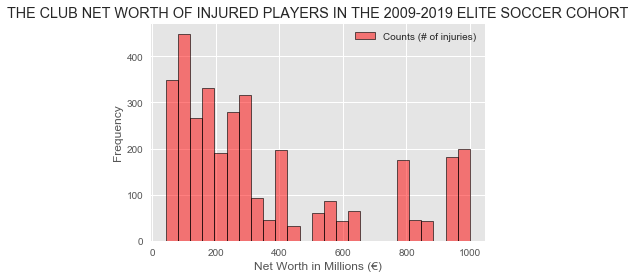

In [486]:
df_recjcur['club_value'].plot(kind='hist',bins=25,lw=.6,
edgecolor='black',label='Counts (# of injuries)',fc=(1, 0, 0, 0.5),color='tomato')

plt.title('THE CLUB NET WORTH OF INJURED PLAYERS IN THE 2009-2019 ELITE SOCCER COHORT')
plt.ylabel('Frequency')
plt.xlabel('Net Worth in Millions (€)')
plt.legend(bbox_to_anchor=(1., 1.0))
plt.show()

## SPLIT INJURIES BASED ON AGE

In [487]:
illness_fin.age.value_counts().sort_index()

17     1
18     2
19    22
20    45
21    45
22    59
23    75
24    53
25    74
26    57
27    46
28    49
29    45
30    34
31    39
32    24
33    15
34    16
35     5
36     3
37     1
38     1
39     1
Name: age, dtype: int64

In [488]:
df_recjcur.age.value_counts().sort_index()

16      2
17      6
18     20
19     57
20    115
21    207
22    258
23    274
24    307
25    305
26    292
27    293
28    272
29    244
30    238
31    156
32    134
33    115
34     71
35     41
36     19
37      8
38      8
39      2
40      3
41      1
Name: age, dtype: int64

In [489]:
df_recjcur.to_excel("SOCCER_INJURIES.corr.xlsx",sheet_name='Youth_and_Adult_Player_Injuries')
illness_fin.to_excel("SOCCER_ILLNESS.corr.xlsx",sheet_name='Youth_and_Adult_Player_Illness')

In [490]:
injyouthel = df_recjcur.loc[(df_recjcur['age'] >= 16) & (df_recjcur['age'] <= 19)]
injyouthel['age'].value_counts()

19    57
18    20
17     6
16     2
Name: age, dtype: int64

In [491]:
injyouthel.shape

(85, 20)

In [492]:
injadult =  df_recjcur[df_recjcur['age'] != 17]
injadulte = injadult[injadult['age'] != 18]
injadultel = injadulte[injadulte['age'] != 19]

In [493]:
injadultel['age'].value_counts()
injadultel.head(3)

,id,name,club,club_value,birth,height,country,role,foot,bmi,season,type,severity,age,type (general),location,main,reccurance,ranked severity,recording regime
0,186590,John Stones,Manchester City,1000,1994-05-28,1.88,England,1,right,19.522408,2018-01-01,Hamstring Injury,42,24,1,1.0,1,0.0,Severe,Time-loss
1,90681,Eliaquim Mangala,Manchester City,1000,1991-02-13,1.87,France,1,left,21.161600,2016-01-01,Hamstring Injury,49,25,1,1.0,1,0.0,Severe,Time-loss
2,157495,Benjamin Mendy,Manchester City,1000,1994-07-17,1.85,France,2,left,24.835646,2016-01-01,Hamstring Injury,24,22,1,1.0,1,0.0,Moderate,Time-loss


In [494]:
df_recjcur[df_recjcur['type (general)'] != 'Concussion']
df_recjcur[df_recjcur['type (general)'] != 'Haematoma/contusion/bruise']
s = df_recjcur['severity']
s.astype(int).sum()

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


126971

## STUDY SUMMARY FOR RESEARCH:
---------

* **AIMS:** This study was purposed for three goals: 
    1. **To prospectively report seasonal injury** in terms of incidence and burden with decriptions presented in terms of **type, location, and body region**, if allowable.
    2. **To analyze and compare the predictive ability of of machine learning techniques (ANN, stacked esembles of algorithms)** to select the best performing injury risk factor model; to **identify professional soccer players at high risk of mild-moderate severity, and location, body region, and type specific injuries**, performance will undergo measurement by a confusion matrix and percision, recall, F1, and Cohen's kappa.
    3. To create **sportinjuri: a Web/SMS based application with the top performing machine learning algorithm predicting percent risk (% probablity)** of mild-moderate severity, and location, body region, and type specific injuries, thereupon an athelete's entry of their **age, player position, years since they signed their first contract with a professional club, estimated club value (in millions), if they ever had an injury reccuring within the same season, and if they ever had an injury reccuring between multiple seasons**. 
    ----------
    
    

* **METHODS:** Injuries from 3,448 male soccer players from 98 elite/professional soccer teams across Europe will be included and analyzed from an 11 season period (2009–2019), with a total of 126,971 player-time-loss-days due to injury and 4,556 time-loss-days due to illness recorded. The processed dataset yielded baseline information that included a large number of individual measurements (i.e. age, height, weight, BMI, dominant foot, etc.) and a club based monetary value. All time-loss injuries were documented in the pre-processed open-source dataset. All pre-reccorded illness episodes will undergo exlusion, as they prove a physical or psychological symptom that do not derive from injury (Fuller et al., 2006). Also, injury processing and classificaiton adhered the definitions and procedures detailed in the 2006 consensus statement (Fuller et al., 2006). 

-----

## PROFILING THE DATA SET BY TYPE AND LOCATION!

In [495]:
df1 = df[df['type'] == 'Hamstring Injury'] # type loc main
df2 = df[df['type'] == 'Muscular problems'] #type 
df3 = df[df['type'] == 'Muscle Injury'] #type
df4 = df[df['type'] == 'Thigh Problems'] # type loc main
df5 = df[df['type'] == 'Torn Muscle Fibre'] #type  
df6 = df[df['type'] == 'Knock'] #type  
df7 = df[df['type'] == 'Minor Knock'] #type  
df8 = df[df['type'] == 'Adductor problems'] #type loc main
df9 = df[df['type'] == 'Cruciate Ligament Rupture'] #type loc main
df10 = df[df['type'] == 'Influenza'] #type  
df11 = df[df['type'] == 'Calf Injury'] #loc #main #type  muscle
df12 = df[df['type'] == 'Thigh Muscle Strain'] #loc #main #type  muscle
df13 = df[df['type'] == 'Calf Problems'] #loc #main #type  muscle
df14 = df[df['type'] == 'Ill'] #type  
df15 = df[df['type'] == 'Tear in the abductor muscle'] #type loc main
df16 = df[df['type'] == 'Groin Injury'] #loc #main #type  muscle
df17 = df[df['type'] == 'Achilles tendon problems'] #loc #main #type  muscle
df18 = df[df['type'] == 'Bruise'] # # #type  
df19 = df[df['type'] == 'groin strain'] #loc #main #type  muscle
df20 = df[df['type'] == 'Muscle Fatigue'] # # #type  muscle
df21 = df[df['type'] == 'Strain'] # # #type  muscle
df22 = df[df['type'] == 'Cold'] #type  
df23 = df[df['type'] == 'Abdominal Influenza'] # # #type  muscle
df24 = df[df['type'] == 'Biceps femoris muscle injury'] #loc #main #type  muscle
df25 = df[df['type'] == 'Concussion'] #type loc main
df26 = df[df['type'] == 'Flu'] # # #type  muscle
df27 = df[df['type'] == 'Torn muscle bundle'] #type  
df28 = df[df['type'] == 'Sprained ankle']# loc main type
df29 = df[df['type'] == 'Bruised Knee'] #type loc main
df30 = df[df['type'] == 'Metatarsal Fracture'] #type loc
df31 = df[df['type'] == 'Meniscal Injury'] #type loc main
df32 = df[df['type'] == 'Fever'] #type 
df33 = df[df['type'] == 'Infection'] #type 
df34 = df[df['type'] == 'Nasal Bone Fracture'] #type loc main
df35 = df[df['type'] == 'Bruised Foot'] #type loc main
df36 = df[df['type'] == 'Bruised Rib'] #type loc main
df37 = df[df['type'] == 'Pulled hamstring at the adductors'] #type loc main
df38 = df[df['type'] == 'Calf Strain'] #type loc main
df39 = df[df['type'] == 'Sprained Ankle'] #type loc main
df40 = df[df['type'] == 'Ligament Injury'] #type loc main
df41 = df[df['type'] == 'Groin Strain'] #type loc main
df42 = df[df['type'] == 'Calf muscle strain'] #type loc main
df43 = df[df['type'] == 'Distortion of the ankle'] #loc #main #type  muscle
#-----------------------------------------------------------------------------------------------------------------#



#ISOLATING DATASET TO FIND MOST FREQUENT TYPES
#ISOLATING DATASET TO FIND THE MOST FREQUENT LOCATION + MAIN CATEGORY IS THE DERIVATIVE OF LOCATION


In [496]:
df46 = df[df['type'] == 'Hamstring Injury'] #type loc main
df47 = df[df['type'] == 'Ankle Injury'] #type loc main
df48 = df[df['type'] == 'Thigh Problems'] #loc #main #type  muscle
df49 = df[df['type'] == 'Knee Problems '] #loc #main #type  muscle
df50 = df[df['type'] == 'Adductor problems'] #type loc main
df51 = df[df['type'] == 'Shoulder Injury'] #type loc main
df52 = df[df['type'] == 'Cruciate Ligament Rupture'] #loc #main #type  muscle
df53 = df[df['type'] == 'Back trouble'] #loc #main #type  muscle
df54 = df[df['type'] == 'Calf Injury'] #type loc main
df55 = df[df['type'] == 'Thigh Muscle Strain'] #loc #main #type  muscle
df56 = df[df['type'] == 'Calf Problems'] #loc #main #type  muscle
df57 = df[df['type'] == 'Tear in the abductor muscle'] #type loc main
df58 = df[df['type'] == 'Groin Injury'] #loc #main #type  muscle
df59 = df[df['type'] == 'Foot Injury'] #loc #main #type  muscle
df60 = df[df['type'] == 'Achilles tendon problems'] #loc #main #type  muscle
df61 = df[df['type'] == 'groin strain'] #loc #main #type  muscle
df62 = df[df['type'] == 'Ankle problems'] #loc #main #type  muscle
df63 = df[df['type'] == 'Biceps femoris muscle injury'] #loc #main #type  muscle
df64 = df[df['type'] == 'Concussion'] #loc #main #type  muscle
df65 = df[df['type'] == 'Hip Injury'] #loc #main #type  muscle
df66 = df[df['type'] == 'Distortion of the ankle'] #loc #main #type  muscle
df67 = df[df['type'] == 'Knee Surgery'] #loc #main #type  muscle
df68 = df[df['type'] == 'Leg Injury'] #loc #main #type  muscle
df69 = df[df['type'] == 'Sprained ankle'] #loc #main #type  muscle
df70 = df[df['type'] == 'Bruised Knee'] #loc #main #type  muscle
df71 = df[df['type'] == 'Metatarsal Fracture'] #loc #main #type  muscle
df72 = df[df['type'] == 'Hip problems'] #loc #main #type  muscle
df73 = df[df['type'] == 'Meniscal Injury'] #loc #main #type  muscle
df74 = df[df['type'] == 'Back Injury'] #loc #main #type  muscle
df75 = df[df['type'] == 'Nasal Bone Fracture'] #loc #main #type  muscle
df76 = df[df['type'] == 'Bruised Foot'] #loc #main #type  muscle
df77 = df[df['type'] == 'Bruised Rib'] #loc #main #type  muscle
df78 = df[df['type'] == 'Toe Injury'] #loc #main #type  muscle
df79 = df[df['type'] == 'Pulled hamstring at the adductors'] #loc #main #type  muscle
df80 = df[df['type'] == 'Calf Strain'] #loc #main #type  muscle
df81 = df[df['type'] == 'Sprained Ankle'] #loc #main #type  muscle
df82 = df[df['type'] == 'Head Injury'] #loc #main #type  muscle
df83 = df[df['type'] == 'Groin Strain'] #loc #main #type  muscle
df84 = df[df['type'] == 'Calf muscle strain'] #loc #main #type  muscle



In [497]:
df1['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df2['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df3['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df4['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df5['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df6['type (general)'] = 'Haematoma/contusion/bruise'
df7['type (general)'] = 'Haematoma/contusion/bruise'
df8['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df9['type (general)'] = 'Sprain/ligament injury'
df10['type (general)'] = 'Other (Illness)'
df11['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df12['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df13['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df14['type (general)'] = 'Other (Illness)'
df15['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df16['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df17['type (general)'] = 'Tendon injury/rupture/tendinosis/bursitis'
df18['type (general)'] = 'Haematoma/contusion/bruise'
df19['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df20['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df21['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df22['type (general)'] = 'Other (Illness)'
df23['type (general)'] = 'Other (Illness)'
df24['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df25['type (general)'] = 'Concussion'
df26['type (general)'] = 'Other (Illness)'
df27['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df28['type (general)'] = 'Sprain/ligament injury'
df29['type (general)'] = 'Haematoma/contusion/bruise'
df30['type (general)'] = 'Fracture'
df31['type (general)'] = 'Lesion of meniscus or cartilage'
df32['type (general)'] = 'Other (Illness)'
df33['type (general)'] = 'Other (Illness)'
df34['type (general)'] = 'Fracture'
df35['type (general)'] = 'Haematoma/contusion/bruise'
df36['type (general)'] = 'Haematoma/contusion/bruise'
df37['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df38['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df39['type (general)'] = 'Sprain/ligament injury'
df40['type (general)'] = 'Sprain/ligament injury'
df41['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df42['type (general)'] = 'Muscle rupture/tear/strain/cramps'
df43['type (general)'] = 'Sprain/ligament injury'

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [498]:
df46['location'] = 'Thigh'
df47['location'] = 'Ankle'
df48['location'] = 'Thigh'
df49['location'] = 'Knee'
df50['location'] = 'Hip/groin' #groin abd = hip
df51['location'] = 'Shoulder/clavicula'
df52['location'] = 'Knee' #groin abd = hip
df53['location'] = 'Lower back/pelvis/sacrum'
df54['location'] = 'Lower leg/Achilles tendon' #groin abd = hip
df55['location'] = 'Thigh'
df56['location'] = 'Lower leg/Achilles tendon' #groin abd = hip
df57['location'] = 'Hip/groin'
df58['location'] = 'Hip/groin' #groin abd = hip
df59['location'] = 'Foot/toe' #foot
df60['location'] = 'Lower leg/Achilles tendon' #achilles
df61['location'] = 'Hip/groin' #groin abd = hipten
df62['location'] = 'Ankle'
df63['location'] = 'Thigh' #groin abd = hip
df64['location'] = 'Head/face'
df65['location'] = 'Hip/groin' #groin abd = hip
df66['location'] = 'Ankle'
df67['location'] = 'Knee' #groin abd = hip
df68['location'] = 'Lower leg/Achilles tendon'
df69['location'] = 'Ankle' #groin abd = hip
df70['location'] = 'Knee'
df71['location'] = 'Foot/toe'
df72['location'] = 'Hip/groin'
df73['location'] = 'Knee'
df74['location'] = 'Lower back/pelvis/sacrum'
df75['location'] = 'Head/face'
df76['location'] = 'Foot/toe'
df77['location'] = 'Sternum/ribs/upper back'
df78['location'] = 'Foot/toe'
df79['location'] = 'Thigh'
df80['location'] = 'Lower leg/Achilles tendon'
df81['location'] = 'Ankle'
df82['location'] = 'Head/face'
df83['location'] = 'Hip/groin'
df84['location'] = 'Lower leg/Achilles tendon'










/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [499]:
df46['main'] = 'Lower limbs'
df47['main'] = 'Lower limbs'
df48['main'] = 'Lower limbs'
df49['main'] = 'Lower limbs'
df50['main'] = 'Lower limbs' #groin abd = hip
df51['main'] = 'Upper limbs'
df52['main'] = 'Lower limbs' #groin abd = hip
df53['main'] = 'Trunk'
df54['main'] = 'Lower limbs' #groin abd = hip
df55['main'] = 'Lower limbs'
df56['main'] = 'Lower limbs' #groin abd = hip
df57['main'] = 'Lower limbs'
df58['main'] = 'Lower limbs' #groin abd = hip
df59['main'] = 'Lower limbs' #foot
df60['main'] = 'Lower limbs' #achilles
df61['main'] = 'Lower limbs' #groin abd = hipten
df62['main'] = 'Lower limbs'
df63['main'] = 'Lower limbs' #groin abd = hip
df64['main'] = 'Head and neck'
df65['main'] = 'Lower limbs' #groin abd = hip
df66['main'] = 'Lower limbs'
df67['main'] = 'Lower limbs' #groin abd = hip
df68['main'] = 'Lower limbs'
df69['main'] = 'Lower limbs' #groin abd = hip
df70['main'] = 'Lower limbs'
df71['main'] = 'Lower limbs'
df72['main'] = 'Lower limbs'
df73['main'] = 'Lower limbs'
df74['main'] = 'Trunk'
df75['main'] = 'Head and neck'
df76['main'] = 'Lower limbs'
df77['main'] = 'Trunk'
df78['main'] = 'Lower limbs'
df79['main'] = 'Lower limbs'
df80['main'] = 'Lower limbs'
df81['main'] = 'Lower limbs'
df82['main'] = 'Head and neck'
df83['main'] = 'Lower limbs'
df84['main'] = 'Lower limbs'


/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

# TYPE AND LOCATION AND MAIN CATEGORY DATASET: PROFILING AND MAKING SPECIAL DATASETS FOR INFORMATIVE PLOTS

In [500]:
df_location_main = pd.concat([df46,df47,df48,df49,df50,df51,df52,df53,df54,df55,df56,
df57,df58,df59,df60,df61,df62,df63,df64,df65,df66,df67,df68,df69,df70,df71,df72,df73,
df74,df75,df76,df77,df78,df79,df80,df81,df82,df83,df84], ignore_index=True) #MAIN 

In [501]:


df_type = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19
                 ,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,
                 df37,df38,df39,df40,df41,df42,df43], ignore_index=True)

#MOST FREQUENT TYPES

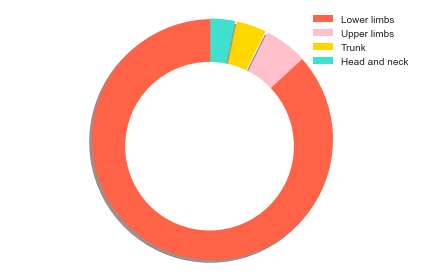

In [502]:
import matplotlib.pyplot as plt

explode = (-0.06,0.06,0.06,0.06)
labels = df_location_main['main'].unique()
sizes = df_location_main['main'].value_counts()
colors = ['tomato', 'pink', 'gold', 'turquoise', 'coral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True,
                         explode=explode,
                         startangle=90,
                         pctdistance=90)

plt.legend(patches, labels, loc="best")

#explsion

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

In [503]:
df_type.head(3)

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age,type (general)
0,186590,John Stones,Manchester City,"1,14 Bill. €",1994-05-28,69.0,1.88,England,Defender - Centre-Back,right,19.522408,2018-01-01,Hamstring Injury,42,24,Muscle rupture/tear/strain/cramps
1,90681,Eliaquim Mangala,Manchester City,"1,14 Bill. €",1991-02-13,74.0,1.87,France,Defender - Centre-Back,left,21.161600,2016-01-01,Hamstring Injury,49,25,Muscle rupture/tear/strain/cramps
2,157495,Benjamin Mendy,Manchester City,"1,14 Bill. €",1994-07-17,85.0,1.85,France,Defender - Left-Back,left,24.835646,2016-01-01,Hamstring Injury,24,22,Muscle rupture/tear/strain/cramps


--------

In [504]:
#df_yrs = df[df['years since transfer'] >= 0] # <--- THIS IS TO MAKE SURE I GET ALL VALUES
        #this is how we get the number of individuals that years since transfer matters: 1,543 individuals injured
                                #this is how we get the number of injuries documented: 6,100 injuries
#df_yrs['name'].nunique()
#df_yrs['role'].nunique()
#v = df.loc[df['type'].str.contains('Calf','calf')]


--------

In [505]:
df.head() # <--- THIS IS TO MAKE SURE I GET ALL VALUES
        #this is how we get the number of individuals: 1,969 individuals injure
                                #this is how we get the number of injuries documented: 12,212 injuries

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89.0,1.88,Brazil,Goalkeeper,left,25.181077,2017-01-01,Meniscal Injury,29,24
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2019-01-01,Achilles tendon rupture,314,36
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2017-01-01,Disrupted Calf Muscle,57,34
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2016-01-01,Calf Injury,17,33
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84.0,1.84,Chile,Goalkeeper,right,24.810964,2016-01-01,Torn muscle bundle,24,33


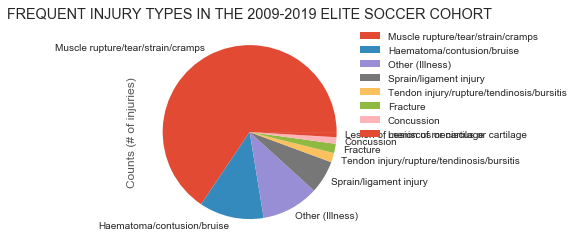

In [506]:
#PROFILING THE DATA AGAIN
df_type['type (general)'].value_counts().plot(kind='pie', label='Counts (# of injuries)')
plt.title('FREQUENT INJURY TYPES IN THE 2009-2019 ELITE SOCCER COHORT')
plt.legend(bbox_to_anchor=(2., 1.0))
plt.show()

In [507]:
d = df_type[df_type['type (general)'] == 'Muscle rupture/tear/strain/cramps']
d['type'].unique()

array(['Hamstring Injury', 'Muscular problems', 'Muscle Injury',
       'Thigh Problems', 'Torn Muscle Fibre', 'Adductor problems',
       'Calf Injury', 'Thigh Muscle Strain', 'Calf Problems',
       'Tear in the abductor muscle', 'Groin Injury', 'groin strain',
       'Muscle Fatigue', 'Strain', 'Biceps femoris muscle injury',
       'Torn muscle bundle', 'Pulled hamstring at the adductors',
       'Calf Strain', 'Groin Strain', 'Calf muscle strain'], dtype=object)

In [508]:
t = df_type[df_type['type (general)'] == 'Haematoma/contusion/bruise']
t['type'].unique()

array(['Knock', 'Minor Knock', 'Bruise', 'Bruised Knee', 'Bruised Foot',
       'Bruised Rib'], dtype=object)

In [509]:
qw = df_type[df_type['type (general)'] == 'Sprain/ligament injury']
qw['type'].unique()

array(['Cruciate Ligament Rupture', 'Sprained ankle', 'Sprained Ankle',
       'Ligament Injury', 'Distortion of the ankle'], dtype=object)

In [510]:
qe = df_type[df_type['type (general)'] == 'Other (Illness)']
qe['type'].unique()

array(['Influenza', 'Ill', 'Cold', 'Abdominal Influenza', 'Flu', 'Fever',
       'Infection'], dtype=object)

In [511]:
qr = df_type[df_type['type (general)'] == 'Tendon injury/rupture/tendinosis/bursitis']
qr['type'].unique()

array(['Achilles tendon problems'], dtype=object)

In [512]:
qt = df_type[df_type['type (general)'] == 'Fracture']
qt['type'].unique()

array(['Metatarsal Fracture', 'Nasal Bone Fracture'], dtype=object)

In [513]:
qy = df_type[df_type['type (general)'] == 'Lesion of meniscus or cartilage']
qy['type'].unique()

array(['Meniscal Injury'], dtype=object)

------

In [514]:
#DIVISION BY TYPE: 8 MAIN TYPES

muscle = ['Hamstring Injury', 'Muscular problems', 'Muscle Injury',
       'Thigh Problems', 'Torn Muscle Fibre', 'Adductor problems',
       'Calf Injury', 'Thigh Muscle Strain', 'Calf Problems',
       'Tear in the abductor muscle', 'Groin Injury', 'groin strain',
       'Muscle Fatigue', 'Strain', 'Biceps femoris muscle injury',
       'Torn muscle bundle', 'Pulled hamstring at the adductors',
       'Calf Strain', 'Groin Strain', 'Calf muscle strain']

contusion = ['Knock', 'Minor Knock', 'Bruise', 'Bruised Knee', 'Bruised Foot',
       'Bruised Rib']

ligament =  ['Cruciate Ligament Rupture', 'Sprained ankle', 'Sprained Ankle',
       'Ligament Injury', 'Distortion of the ankle']

illness = ['Influenza', 'Ill', 'Cold', 'Abdominal Influenza', 'Flu', 'Fever',
       'Infection']
tendon = ['Achilles tendon problems']

fracture = ['Metatarsal Fracture', 'Nasal Bone Fracture']

concussion = ['Concussion']

cartilage = ['Meniscal Injury']

print(len(muscle)+len(contusion)+len(ligament)+len(illness)+len(tendon)+len(fracture)+len(concussion)+len(cartilage))

43


In [515]:
df_type.head(2)
#CLASS #loc, main, -type, severity in terms of classification
#FEATURE #reccurance, role, foot, -age

,id,name,club,club_value,birth,weight,height,country,role,foot,bmi,season,type,severity,age,type (general)
0,186590,John Stones,Manchester City,"1,14 Bill. €",1994-05-28,69.0,1.88,England,Defender - Centre-Back,right,19.522408,2018-01-01,Hamstring Injury,42,24,Muscle rupture/tear/strain/cramps
1,90681,Eliaquim Mangala,Manchester City,"1,14 Bill. €",1991-02-13,74.0,1.87,France,Defender - Centre-Back,left,21.161600,2016-01-01,Hamstring Injury,49,25,Muscle rupture/tear/strain/cramps


 ### Data Visualizations:

## How the researcher is going to classify injruies: BY TYPE 

* Fracture
* Other bone injuries
* Dislocation/subluxation
* Sprain/ligament injury
* Lesion of meniscus or cartilage
* Muscle rupture/tear/strain/cramps
* Tendon injury/rupture/tendinosis/bursitis
* Haematoma/contusion/bruise
* Abrasion
* Laceration
* Concussion (with or without loss of consciousness)
* Nerve injury
* Dental injuries
* Other injuries (Will be illness; remember to remove rows that have with condition within analyzing loc and main)
--------
## AND LOCATION

* Head/face
* Neck/cervical spine 
* Shoulder/clavicula
* Upper arm
* Elbow
* Forearm
* Wrist
* Hand/finger/thumb 
* Sternum/ribs/upper back 
* Abdomen
* Lower back/pelvis/sacrum 
* Hip/groin
* Thigh
* Knee
* Lower leg/Achilles tendon 
* Ankle
* Foot/toe

------ 
##  AND MAIN CATEGORIES
* Head and neck 
* Upper limbs
* Trunk 
* Lower limbs
-----
## AND MEDICAL ATTENTION/TIMELOSS

* TIME LOSS = MORE THAN 0 SEVERITY IN DAYS
* MEDICAL ATTENTION = 0 SEVERITY IN DAYS








# Informarive Plots



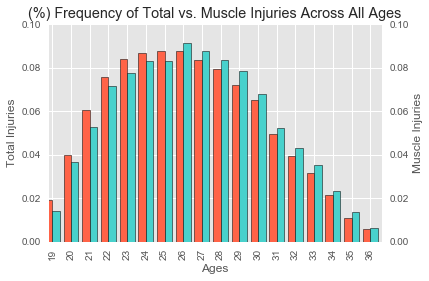

In [516]:
fig = plt.figure() # Create matplotlib figure
plt.style.use('ggplot')



ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('(%) Frequency of Total vs. Muscle Injuries Across All Ages')
width = 0.4

df_type[(df_type['age'] > 18) & (df_type['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar', color='tomato', ax=ax, width=width, position=1,edgecolor='black', lw=.5)
df_type[(df_type['type'].isin(muscle))
   & (df_type['age'] > 18) & (df_type['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='mediumturquoise', ax=ax2, width=width, position=0,edgecolor='black',lw=.5)

ax.set_ylabel('Total Injuries')
ax2.set_ylabel('Muscle Injuries')

ax2.grid()
ax.set_xlabel('Ages')

ax.set_ylim((0,0.10))
ax2.set_ylim((0,0.10))

plt.show()
#players over 26 

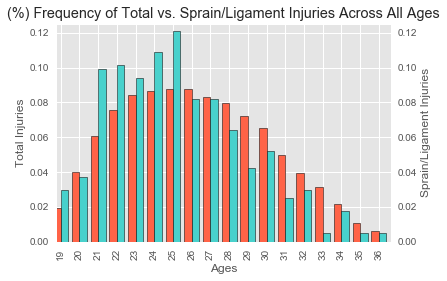

In [517]:
#MUS,TEND,SPRAIN, ILLVSINJ
plt.style.use('ggplot')


fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('(%) Frequency of Total vs. Sprain/Ligament Injuries Across All Ages')
width = 0.4
ax.set_ylim((0,0.12))
df_type[(df_type['age'] > 18) & (df_type['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar', color='tomato', ax=ax, width=width, position=1,edgecolor='black',lw=.5)
df_type[(df_type['type'].isin(ligament))
   & (df_type['age'] > 18) & (df_type['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='mediumturquoise', ax=ax2, width=width, position=0,edgecolor='black',lw=.5)

ax.set_ylabel('Total Injuries')
ax2.set_ylabel('Sprain/Ligament Injuries')
ax.set_xlabel('Ages')
ax2.grid()

ax.set_ylim((0,0.125))
ax2.set_ylim((0,0.125))

plt.show()
#18-25 younger

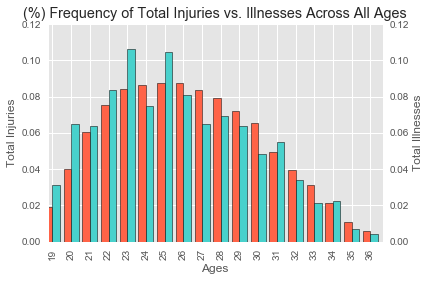

In [518]:
#MUS,TEND,SPRAIN, ILLVSINJ
plt.style.use('ggplot')


fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('(%) Frequency of Total Injuries vs. Illnesses Across All Ages')
width = 0.4
ax.set_ylim((0,0.12))
df_type[(df_type['age'] > 18) & (df_type['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar', color='tomato', ax=ax, width=width, position=1,edgecolor='black',lw=.5)
df_type[(df_type['type'].isin(illness))
   & (df_type['age'] > 18) & (df_type['age'] < 37)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='mediumturquoise', ax=ax2, width=width, position=0,edgecolor='black',lw=.5)

ax.set_ylabel('Total Injuries')
ax2.set_ylabel('Total Illnesses')
ax2.grid()
ax.set_xlabel('Ages')
ax.set_ylim((0,0.12))
ax2.set_ylim((0,0.12))
plt.show()
#19-25

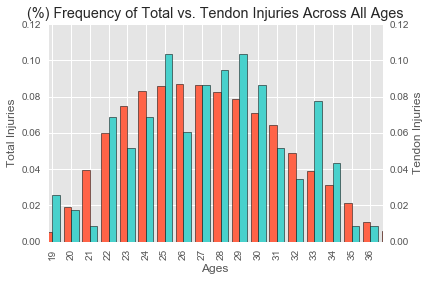

In [519]:
#MUS,TEND,SPRAIN, ILLVSINJ
plt.style.use('ggplot')


fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('(%) Frequency of Total vs. Tendon Injuries Across All Ages')
width = 0.4
ax.set_ylim((0,0.12))
df_type[(df_type['age'] > 17) & (df_type['age'] < 39)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar', color='tomato', ax=ax, width=width, position=1,edgecolor='black',lw=.5)
df_type[(df_type['type'].isin(tendon))
   & (df_type['age'] > 17) & (df_type['age'] < 39)]['age'].value_counts(normalize='true').sort_index().plot(kind='bar',color='mediumturquoise', ax=ax2, width=width, position=0,edgecolor='black',lw=.5)

ax.set_ylabel('Total Injuries')
ax2.set_ylabel('Tendon Injuries')
ax2.grid()
ax.set_xlabel('Ages')
ax.set_ylim((0,0.12))
ax2.set_ylim((0,0.12))
plt.show()
#27-30

In [520]:
concussions = 81/6682
print("Remember: concussions occur "+str(concussions*100)+"% of the time within the dataset ")

Remember: concussions occur 1.2122119126010178% of the time within the dataset 


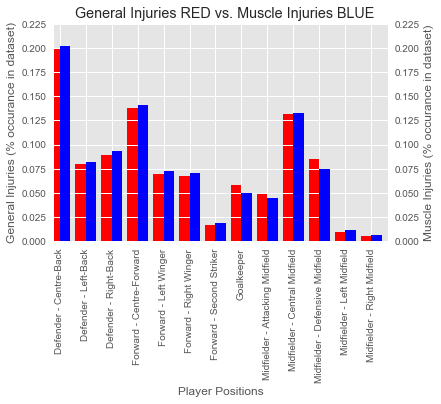

In [521]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. Muscle Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(muscle))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('Muscle Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.225))
ax2.set_ylim((0,0.225))
plt.show()


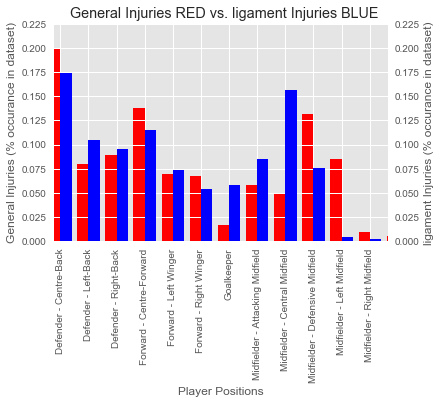

In [522]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. ligament Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(ligament))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('ligament Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.225))
ax2.set_ylim((0,0.225))
plt.show()



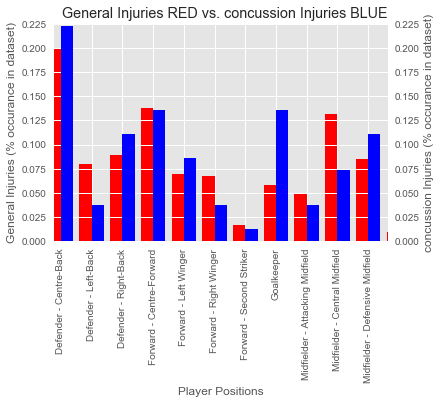

In [523]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. concussion Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(concussion))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('concussion Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.225))
ax2.set_ylim((0,0.225))
plt.show()



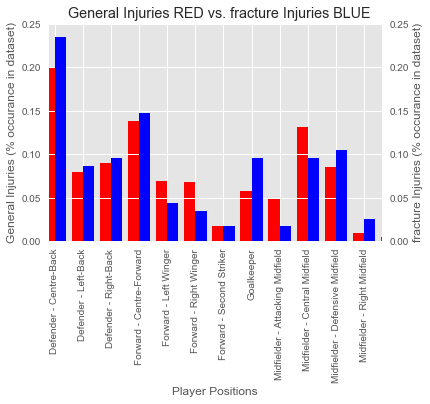

In [524]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. fracture Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(fracture))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('fracture Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.250))
ax2.set_ylim((0,0.250))
plt.show()




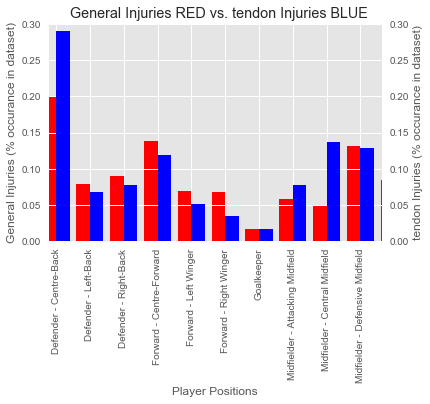

In [525]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. tendon Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(tendon))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('tendon Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.3))
ax2.set_ylim((0,0.3))
plt.show()




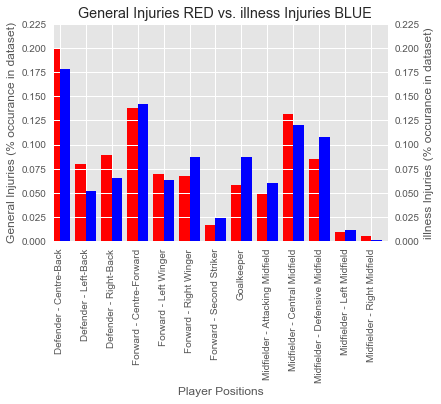

In [526]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. illness Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(illness))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('illness Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.225))
ax2.set_ylim((0,0.225))
plt.show()




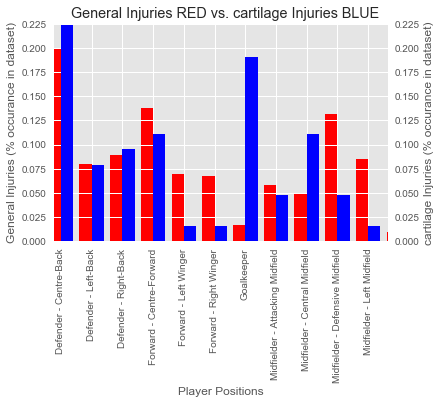

In [527]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. cartilage Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(cartilage))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('cartilage Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.225))
ax2.set_ylim((0,0.225))
plt.show()




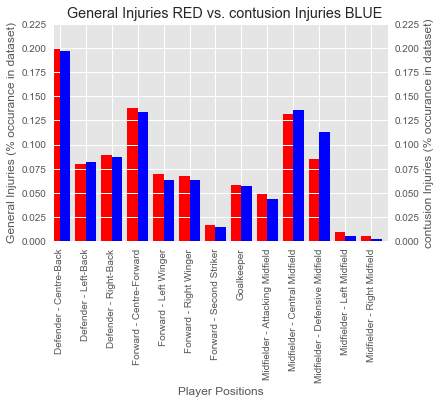

In [528]:
fig = plt.figure() # Create matplotlib figure
#VISUALIZATION INJURIES BASED ON ROLE
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.set_title('  General Injuries RED vs. contusion Injuries BLUE')
width = 0.4
ax.set_ylim((0,0.225))
df_type['role'].value_counts(normalize='true').sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_type[(df_type['type'].isin(contusion))
   &(df_type['age'] > 10) & (df_type['age'] < 40)]['role'].value_counts(normalize='true').sort_index().plot(kind='bar',color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('General Injuries (% occurance in dataset)')
ax2.set_ylabel('contusion Injuries (% occurance in dataset)')
ax.set_xlabel('Player Positions')
ax.set_ylim((0,0.225))
ax2.set_ylim((0,0.225))
plt.show()




----

## AGLORITHM (Data Prep)

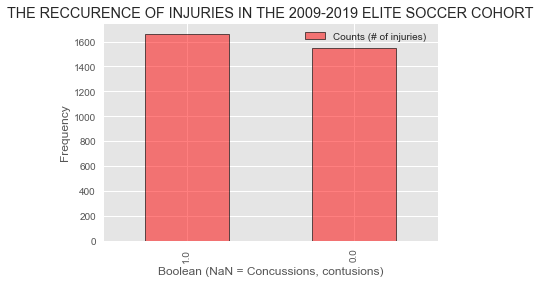

0.44913294797687864

In [529]:
df_recjcur['reccurance'].value_counts().plot(kind='bar',edgecolor='black', lw=.6, fc=(1, 0, 0, 0.5),label='Counts (# of injuries) ',color='tomato')
plt.title('THE RECCURENCE OF INJURIES IN THE 2009-2019 ELITE SOCCER COHORT')
plt.ylabel('Frequency')
plt.xlabel('Boolean (NaN = Concussions, contusions)')
plt.legend(bbox_to_anchor=(1., 1.0))
plt.show() #yucky deku
1554/3460

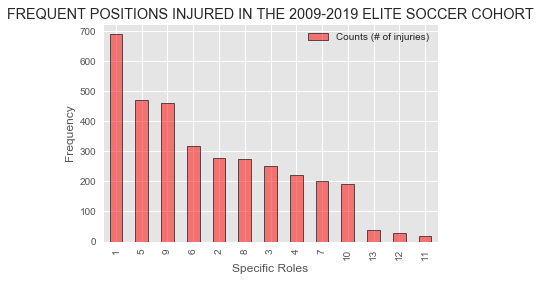

In [530]:
df_recjcur['role'].value_counts().plot(kind='bar',edgecolor='black', lw=.6, fc=(1, 0, 0, 0.5),label='Counts (# of injuries)',color='tomato')
plt.title('FREQUENT POSITIONS INJURED IN THE 2009-2019 ELITE SOCCER COHORT')
plt.ylabel('Frequency')
plt.xlabel('Specific Roles')
plt.legend(bbox_to_anchor=(1., 1.0))
plt.show() #yucky deku


In [531]:
df_recjcur['location'].unique()

array([ 1.,  2.,  3.,  4.,  7.,  5.,  6., nan])

In [532]:
df_recjcur['type (general)'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [533]:
df_recjcu = df_recjcur[df_recjcur['type (general)'] != 4]
df_recjcu = df_recjcu[df_recjcu['type (general)'] != 5]


In [534]:
df_recjcu['main'].value_counts()

1    3161
2      48
Name: main, dtype: int64

In [535]:
df_recjcu['location'].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [536]:
df_recjcu['location'].value_counts()

1.0    1477
2.0     656
4.0     529
3.0     250
5.0     183
6.0      66
7.0      48
Name: location, dtype: int64

In [537]:
df_recjcu['id'].nunique()

1346

In [538]:
df_recjcu['type (general)'].unique()

array([1, 2, 3, 6, 7])

In [539]:
new = df_recjcu.drop(['id', 'name','foot' ,'club','birth','height','country','season','severity',], axis=1)

In [540]:
new.head() #using role, bmi, age, reccurance, club_value to predict type type gen loc, main ranked sev and
#rr
new = new[new['location'] != 'nan']

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [541]:
new['role'].nunique()

13

In [542]:
k = new.drop(['type','type (general)','location','main',
              ], 
             axis=1)#'ranked severity','recording regime'

In [543]:
k.head()

,club_value,role,bmi,age,reccurance,ranked severity,recording regime
0,1000,1,19.522408,24,0.0,Severe,Time-loss
1,1000,1,21.161600,25,0.0,Severe,Time-loss
2,1000,2,24.835646,22,0.0,Moderate,Time-loss
3,1000,3,19.198960,21,0.0,Severe,Time-loss
4,1000,4,21.799308,24,0.0,Moderate,Time-loss


In [665]:
k = k.drop(['ranked severity','recording regime'],axis=1)

In [666]:
k_array = k.to_numpy()

In [667]:
b = new.drop(['role','bmi','age','reccurance','location','main','type','club_value','role','bmi'], axis=1) #'ranked severity','recording regime'

In [668]:
b.head()

,type (general),ranked severity,recording regime
0,1,Severe,Time-loss
1,1,Severe,Time-loss
2,1,Moderate,Time-loss
3,1,Severe,Time-loss
4,1,Moderate,Time-loss


In [669]:
import numpy as np
>>> from sklearn import metrics
>>> from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="micro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

## ALGORITHM FOR TYPES OF INJURY (EXLUDING CONCUSSION AND HAEMATOMA)

In [688]:
h = b.drop(['ranked severity','recording regime'],axis=1)

h = h.astype(int)


In [689]:
h_array = h.to_numpy()

h_array

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]])

In [690]:
x = k_array[:,0:5] #features

In [691]:
y = h_array[:,0] #classes

In [692]:
#Feature extraction
#from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression

testtype = SelectKBest(score_func=chi2, k='all')
testtype2 = SelectKBest(score_func=f_regression, k='all')


fit = testtype.fit(x1, y1)
fit2 = testtype2.fit(x1, y1)


# Summarize scores
np.set_printoptions(precision=3)
print("HERE ARE THE SCORES FOR THE CHI^2")
print(' CLUB,   ROLE,   BMI,  AGE, RECURRENCE') 
print(fit.scores_)
print('HERE ARE THE PVALUES FOR THE CHI^2') 
print(' CLUB,   ROLE,   BMI,  AGE, RECURRENCE') 
print(fit.pvalues_)
features = fit.transform(x1)

print("HERE ARE THE SCORES FOR THE F_REGRESSION ")
print(' CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE') 
print(fit2.scores_)
print('HERE ARE THE PVALUES FOR THE F_REGRESSION') 
print(' CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE') 
print(fit2.pvalues_)
features2 = fit2.transform(x1)
# Summarize selected features
print(' CLUB,   ROLE,   BMI,  AGE, RECURRENCE') 
print(features[0:5,:]) # no bmi role ; club val. age reccurance
#BMI 3.573e-01 AGE 8.260e-14 

HERE ARE THE SCORES FOR THE CHI^2
 CLUB,   ROLE,   BMI,  AGE, RECURRENCE
[6.616e+03 2.118e+00 2.554e-01 6.249e+01 3.910e+01]
HERE ARE THE PVALUES FOR THE CHI^2
 CLUB,   ROLE,   BMI,  AGE, RECURRENCE
[0.000e+00 7.141e-01 9.925e-01 8.669e-13 6.645e-08]
HERE ARE THE SCORES FOR THE F_REGRESSION 
 CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE
[ 9.182  0.381  0.848 56.239 43.709]
HERE ARE THE PVALUES FOR THE F_REGRESSION
 CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE
[2.463e-03 5.372e-01 3.573e-01 8.260e-14 4.446e-11]
 CLUB,   ROLE,   BMI,  AGE, RECURRENCE
[[1000.       1.      19.522   24.       0.   ]
 [1000.       1.      21.162   25.       0.   ]
 [1000.       2.      24.836   22.       0.   ]
 [1000.       3.      19.199   21.       0.   ]
 [1000.       4.      21.799   24.       0.   ]]


In [693]:
ktype = k.drop(['bmi','role',], axis=1)

In [694]:
ktype_array = ktype.to_numpy()

In [695]:
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [696]:
# import IMPORTANT LIBRARIES 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #RFC
from xgboost import XGBClassifier #XGBOOST
from sklearn.ensemble import AdaBoostClassifier #ADABOOST
from sklearn.neural_network import MLPClassifier 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from vecstack import stacking
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 

In [697]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train, y_train = smote.fit_sample(x1, y1) #class_weight="balanced"

In [698]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.20, random_state=42) 

In [699]:
type2model = [
KNeighborsClassifier(n_neighbors=5,n_jobs=-1),
GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=50),
XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.05, n_estimators=100, max_depth=3),
RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3,class_weight="balanced"),
ExtraTreesClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3,class_weight="balanced"),]

          
                

In [700]:
ktype = k.drop(['bmi','role'],axis=1)
ktype_array = ktype.to_numpy()

In [701]:
m_train, m_test = stacking(type2model,                   
                           x_train, y_train, x_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
                          
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [5]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.78404669]
    fold  1:  [0.77237354]
    fold  2:  [0.78557505]
    fold  3:  [0.76218324]
    fold  4:  [0.78167641]
    ----
    MEAN:     [0.77717099] + [0.00878465]
    FULL:     [0.77717180]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.78210117]
    fold  1:  [0.77042802]
    fold  2:  [0.79922027]
    fold  3:  [0.77387914]
    fold  4:  [0.77387914]
    ----
    MEAN:     [0.77990155] + [0.01039556]
    FULL:     [0.77989871]

model  2:     [XGBClassifier]
    fold  0:  [0.79377432]
    fold  1:  [0.79182879]
    fold  2:  [0.79532164]
    fold  3:  [0.79337232]
    fold  4:  [0.79337232]
    ----
    MEAN:     [0.79353388] + [0.00111476]
    FULL:     [0.79353331]

model  3:     [RandomForestClassifier]
    fold  0:  [0.19066148]
    fold  1:  [0.20817121]
    fold  2:  [0.17933723]


In [702]:
m = GradientBoostingClassifier(n_estimators=50,
                         learning_rate=1)
mfin = m.fit(m_train, y_train) # Final prediction score: [0.80666667]
y_pred = mfin.predict(m_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.78504673]


In [703]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

from sklearn.model_selection import cross_val_score
#FINAL
scores = cross_val_score(mfin, x, y, cv=5) #0.79 (+/- 0.01)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.07)


In [704]:
# Confusion matrix
#confusion_matrix(y_test, y_pred)
y_pred4score = y_pred.round()
#FINAL
confusion_matrix(y_test, y_pred4score)

array([[504,   3,   0,   1,   1],
       [ 76,   0,   0,   0,   0],
       [ 24,   0,   0,   0,   0],
       [ 24,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0]])

In [705]:
import numpy as np
>>> from sklearn import metrics
>>> from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="micro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

In [706]:
multiclass_roc_auc_score(y_test,y_pred4score)#0.793613707165109

0.8656542056074766

In [707]:
recall_score(y_test, y_pred4score,average='weighted')#0.6697819314641744

0.7850467289719626

In [708]:
precision_score(y_test, y_pred4score,average='weighted')#0.7400619753566666

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6272979357091506

In [709]:
f1_score(y_test, y_pred4score,average='weighted') #0.6927560279270613

0.697362626608602

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


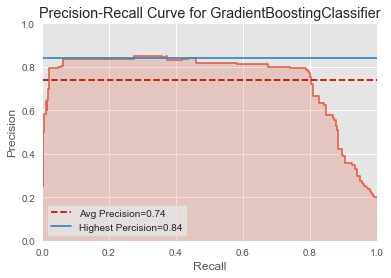

In [710]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(mfin)
viz.fit(m_train, y_train)
viz.score(m_test, y_test)
plt.plot([0,1],[.84,.84],label='Highest Percision=0.84')
viz.show()

In [711]:
new['type (general)'].value_counts()

1    2545
2     370
3     117
6     114
7      63
Name: type (general), dtype: int64

----

-------

------

# Muscle Injury Analysis

In [712]:
reccurance = df_type_location_main_w_VAR[df_type_location_main_w_VAR.duplicated(
    ['id' ,'type (general)','location', 'name','role','foot','type'])] #id, name = person
    #NONSEASONALLY DEPENDENT ()

x = list(reccurance['id'].unique())
u = reccurance['id'].nunique()
print('There are '+ str(u) + 
' players with general reccurance, meaning they had an injury occuring throughout seasons or     within seasons' )

f = df_type_location_main_w_VAR[df_type_location_main_w_VAR['id'].isin(x)]

f['reccurance'] = 'True'
f['type (general)'].unique()

f.loc[f['type (general)'] == 'Concussion', 'reccurance'] = 'NaN'
f.loc[f['type (general)'] == 'Haematoma/contusion/bruise', 'reccurance'] = 'NaN'

oo = df_type_location_main_w_VAR[~df_type_location_main_w_VAR['id'].isin(x)]
oo.head()
oo['reccurance'] = 'False'
oo['type (general)'].unique()

oo['reccurance'].loc[oo['type (general)'] == 'Haematoma/contusion/bruise'] = 'NaN'
oo['reccurance'].loc[oo['type (general)'] == 'Concussion'] = 'NaN'

df_recjcur = pd.concat([oo,f],ignore_index=True )

There are 398 players with general reccurance, meaning they had an injury occuring throughout seasons or     within seasons


/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [713]:
#FIND TARGET VARIBALES FOR HAMSTRING ALG
i = df_recjcu.drop(['id','name','club','club_value','birth','height','country','role','foot','bmi'
                    ,'season','severity','age','type','location','main','reccurance'], axis=1)

In [714]:
i.head()

,type (general),ranked severity,recording regime
0,1,Severe,Time-loss
1,1,Severe,Time-loss
2,1,Moderate,Time-loss
3,1,Severe,Time-loss
4,1,Moderate,Time-loss


In [715]:
i['type (general)'].value_counts()

1    2545
2     370
3     117
6     114
7      63
Name: type (general), dtype: int64

In [716]:
i.head()

,type (general),ranked severity,recording regime
0,1,Severe,Time-loss
1,1,Severe,Time-loss
2,1,Moderate,Time-loss
3,1,Severe,Time-loss
4,1,Moderate,Time-loss


In [717]:
def type_ham(value):
    if value == 1:
        return 1
    else:
        return 0 
i['type (general)'] = i['type (general)'].apply(type_ham)

In [731]:
i['type (general)'].value_counts()

1    2545
0     664
Name: type (general), dtype: int64

In [740]:
i = i.drop(['ranked severity','recording regime'],axis=1)

In [741]:
i_array = i.to_numpy()

In [742]:
i_array

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [743]:
x_muscle = k_array
y_muscle = i_array

In [744]:
x_muscle.shape

(3209, 5)

In [745]:
y_muscle.shape

(3209, 1)

In [746]:
#Feature extraction
from sklearn.feature_selection import f_regression

testtype = SelectKBest(score_func=chi2, k='all')
testtype2 = SelectKBest(score_func=f_regression, k='all')


fit = testtype.fit(x_muscle, y_muscle)
fit2 = testtype2.fit(x_muscle, y_muscle)


# Summarize scores
np.set_printoptions(precision=3)
print("HERE ARE THE SCORES FOR THE CHI^2")
print(' CLUB,   ROLE,   BMI,  AGE, RECURRENCE') 
print(fit.scores_)
print('HERE ARE THE PVALUES FOR THE CHI^2') 
print(' CLUB,   ROLE,   BMI,  AGE, RECURRENCE') 
print(fit.pvalues_)
features = fit.transform(x_muscle)

print("HERE ARE THE SCORES FOR THE F_REGRESSION ")
print(' CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE') 
print(fit2.scores_)
print('HERE ARE THE PVALUES FOR THE F_REGRESSION') 
print(' CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE') 
print(fit2.pvalues_)
features2 = fit2.transform(x_muscle)
# Summarize selected features
print(' CLUB,   ROLE,   BMI,  AGE, RECURRENCE') 
print(features[0:5,:]) # no bmi role ; club val. age reccurance
#BMI 3.573e-01 AGE 8.260e-14 
#club reccurnace age # 

HERE ARE THE SCORES FOR THE CHI^2
 CLUB,   ROLE,   BMI,  AGE, RECURRENCE
[6.136e+03 2.761e-01 4.891e-03 3.686e+01 2.459e+01]
HERE ARE THE PVALUES FOR THE CHI^2
 CLUB,   ROLE,   BMI,  AGE, RECURRENCE
[0.000e+00 5.992e-01 9.442e-01 1.268e-09 7.084e-07]
HERE ARE THE SCORES FOR THE F_REGRESSION 
 CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE
[2.525e+01 1.395e-01 5.525e-02 6.102e+01 5.180e+01]
HERE ARE THE PVALUES FOR THE F_REGRESSION
 CLUB,   ROLE,   [BMI],  [AGE], RECURRENCE
[5.319e-07 7.088e-01 8.142e-01 7.585e-15 7.602e-13]
 CLUB,   ROLE,   BMI,  AGE, RECURRENCE
[[1000.       1.      19.522   24.       0.   ]
 [1000.       1.      21.162   25.       0.   ]
 [1000.       2.      24.836   22.       0.   ]
 [1000.       3.      19.199   21.       0.   ]
 [1000.       4.      21.799   24.       0.   ]]


/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [747]:
kham = k.drop(['bmi','role'], axis=1)
kham_array = kham.to_numpy()
kham.head()

,club_value,age,reccurance
0,1000,24,0.0
1,1000,25,0.0
2,1000,22,0.0
3,1000,21,0.0
4,1000,24,0.0


In [748]:
x_muscle = kham_array

In [749]:
# Split into train/test
x_muscle_train, x_muscle_test, y_muscle_train, y_muscle_test = train_test_split(x_muscle, y_muscle, test_size=0.20, random_state=42) 


In [750]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_muscle_train, y_muscle_train = smote.fit_sample(x_muscle, y_muscle) #class_weight="balanced"

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [751]:
x_muscle_train.shape

(5090, 3)

In [752]:
y_muscle_train.shape

(5090,)

In [753]:
x_muscle_test.shape

(642, 3)

In [754]:
y_muscle_test.shape

(642, 1)

In [755]:
model = [#KNeighborsClassifier(n_neighbors=5,n_jobs=-1),
GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=50),
XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.05, n_estimators=100, max_depth=3),
RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3,class_weight="balanced"),
ExtraTreesClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3,class_weight="balanced"),
]

In [756]:
S_train, S_test = stacking(model,                   
                        
                           x_muscle_train, y_muscle_train, x_muscle_test,    
                           
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
                          
                           metric=accuracy_score, 
    
                           n_folds=6, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.79740872]
    fold  1:  [0.78091873]
    fold  2:  [0.78419811]
    fold  3:  [0.81250000]
    fold  4:  [0.81603774]
    fold  5:  [0.80542453]
    ----
    MEAN:     [0.79941464] + [0.01329999]
    FULL:     [0.79941061]

model  1:     [XGBClassifier]
    fold  0:  [0.74676090]
    fold  1:  [0.74793875]
    fold  2:  [0.74882075]
    fold  3:  [0.77004717]
    fold  4:  [0.76886792]
    fold  5:  [0.77004717]
    ----
    MEAN:     [0.75874711] + [0.01093036]
    FULL:     [0.75874263]

model  2:     [RandomForestClassifier]
    fold  0:  [0.67491166]
    fold  1:  [0.68904594]
    fold  2:  [0.66391509]
    fold  3:  [0.70400943]
    fold  4:  [0.67688679]
    fold  5:  [0.68632075]
    ----
    MEAN:     [0.68251495] + [0.01261343]
    FULL:     [0.68251473]

model  3:     [ExtraTreesClassifier]


In [757]:
gradient = GradientBoostingClassifier(n_estimators=50,learning_rate=1)
finmo = gradient.fit(S_train, y_muscle_train)
y_pred = finmo.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_muscle_test, y_pred)) #[0.81069364]

Final prediction score: [0.78193146]


In [758]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [759]:
from sklearn.model_selection import cross_val_score
#FINAL
scores = cross_val_score(finmo, x_muscle, y_muscle, cv=11) #4 #10
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Accuracy: 0.76 (+/- 0.06)


In [760]:
q = roc_auc_score(y_muscle_test,y_pred)#FINAL 0.6955882352941176
q

0.6458631844838029

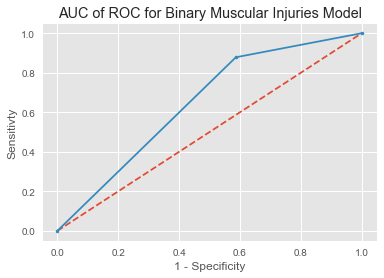

AUC: 0.646


In [761]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as pyplot

fpr, tpr, thresholds = roc_curve(y_muscle_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivty')
pyplot.title('AUC of ROC for Binary Muscular Injuries Model')
pyplot.show()
auc_score = q
print('AUC: %.3f' % auc_score) #AUC: 0.6955

In [764]:
# Confusion matrix
#confusion_matrix(y_test, y_pred)
yd_pred = y_pred.round()

In [765]:
confusion_matrix(y_muscle_test, y_pred)

In [768]:
import numpy as np
from sklearn.metrics import average_precision_score
average_precision_score(y_muscle_test, y_pred).round(3)

0.844

In [769]:
# Recall / Sensitivy
recall_score(y_muscle_test,y_pred,).round(1) #70

0.9

In [770]:
f1_score(y_muscle_test,y_pred).round(3)

0.865

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


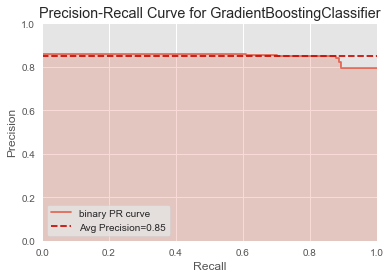

In [772]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(finmo)
viz.fit(S_train, y_muscle_train)
viz.score(S_test, y_muscle_test) #can u drip
viz.show()